In [ ]:
# INDUSTRIAL COPPER MODELING 

In [2]:
#Reading the Dataset 
import pandas as pd
import numpy as np
df_4=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one.xlsx")
# Replace values in 'material_ref' that start with '00000' with NaN
df_4['material_ref'] = df_4['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

# If you want to save the changes back to the Excel file
df_4.to_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx", index=False)





In [3]:
#FINDING NUMBER OF UNIQUE VALUES OF EACH ATTRIBUTE or COLUMN OF THE DATASET
print(len(df_4['item_date'].unique()))
print(len(df_4['customer'].unique()))
print(len(df_4['material_ref'].unique()))
print(len(df_4['product_ref'].unique()))
print(len(df_4['delivery date'].unique()))
print(len(df_4['quantity tons'].unique()))
print(len(df_4['country'].unique()))
print(len(df_4['item type'].unique()))
print(len(df_4['application'].unique()))
print(len(df_4['thickness'].unique()))
print(len(df_4['width'].unique()))
print(len(df_4['selling_price'].unique()))
print(len(df_4['status'].unique()))

253
1170
11496
33
29
181673
18
7
31
595
1386
9796
10


In [4]:
#FIND NUMBER OF NULL VALUES OR MISSING VALUES IN EACH COLUMN OF THE DATASET
missing_values=df_4.isnull().sum()
print(missing_values)

id                    2
item_date             1
quantity tons         0
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         1
selling_price         1
dtype: int64


In [5]:
#HANDLING MISSING VALUES BY REPLACEING THEM WITH mean/median/mode ACCORDING TO THEIR DATA TYPE

import pandas as pd

# Load the Excel file into a DataFrame
df_4 = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx")

# Handling null values
for column in df_4.columns:
    if df_4[column].isnull().sum() > 0:
        if df_4[column].dtype in ['int64', 'float64']:
            # For numeric columns, fill with mean or median
            if df_4[column].skew() < -1 or df_4[column].skew() > 1:
                # If the data is skewed, use median
                df_4[column].fillna(df_4[column].median(), inplace=True)
            else:
                # Otherwise, use mean
                df_4[column].fillna(df_4[column].mean(), inplace=True)
        else:
            # For non-numeric columns, fill with mode
            df_4[column].fillna(df_4[column].mode()[0], inplace=True)

# If you want to save the changes back to the Excel file
df_4.to_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx", index=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_13716\116592938.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_4[column].fillna(df_4[column].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13716\116592938.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [6]:
#CHECKING IF ANY NULL VALUES ARE PRESENT AFTER HANDLING NULL VALUES
missing_values=df_4.isnull().sum()
print(missing_values)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


In [8]:
import pandas as pd
df_4=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx")


In [9]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181673 non-null  object 
 1   item_date      181673 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181673 non-null  int64  
 4   country        181673 non-null  float64
 5   status         181673 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181673 non-null  float64
 8   thickness      181673 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   181673 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181673 non-null  int64  
 13  selling_price  181673 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 19.4+ MB


In [10]:
#DATA FORMATTING

import pandas as pd

df_4['quantity tons']=pd.to_numeric(df_4['quantity tons'],errors='coerce')
df_4['country']=pd.to_numeric(df_4['country'],errors='coerce')
df_4['customer']=pd.to_numeric(df_4['customer'],errors='coerce')
df_4['application']=pd.to_numeric(df_4['application'],errors='coerce')
df_4['thickness']=pd.to_numeric(df_4['thickness'],errors='coerce')
df_4['width']=pd.to_numeric(df_4['width'],errors='coerce')
df_4['selling_price']=pd.to_numeric(df_4['selling_price'],errors='coerce')
df_4.to_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx",index=False)


In [11]:
# DATA FORMATTING
df_4['item_date']=pd.to_datetime(df_4['item_date'],format='%Y%m%d', errors='coerce').dt.date
df_4['delivery date']=pd.to_datetime(df_4['delivery date'],format='%Y%m%d', errors='coerce').dt.date
df_4.to_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx",index=False)

In [12]:
#THE DATE RELATED COLUMNS ARE DROPPED BY SPLITTING THEM INTO YEAR, MONTH AND DAY

import pandas as pd

# Load the dataset
df_4 = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx")

# Convert date columns to datetime format
df_4['item_date'] = pd.to_datetime(df_4['item_date'], format='%Y%m%d')
df_4['delivery date'] = pd.to_datetime(df_4['delivery date'], format='%Y%m%d')

# Split item_date into year, month, day
df_4['item_year'] = df_4['item_date'].dt.year
df_4['item_month'] = df_4['item_date'].dt.month
df_4['item_day'] = df_4['item_date'].dt.day

# Split delivery_date into year, month, day
df_4['delivery_year'] = df_4['delivery date'].dt.year
df_4['delivery_month'] = df_4['delivery date'].dt.month
df_4['delivery_day'] = df_4['delivery date'].dt.day

# Drop the original date columns if no longer needed
df_4.drop(columns=['item_date', 'delivery date'], inplace=True)

# Save the modified dataset to a new file
output_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx"
df_4.to_excel(output_path, index=False)

# For better demonstration, print a few rows of the transformed dataframe
print(df_4.head())


                                     id  quantity tons  customer  country  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE      54.151139  30156308     28.0   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425     768.024839  30202938     25.0   
2  E140FF1B-2407-4C02-A0DD-780A093B1158     386.127949  30153963     30.0   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50     202.411065  30349574     32.0   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD     785.526262  30211560     28.0   

  status item type  application  thickness   width             material_ref  \
0    Won         W         10.0       2.00  1500.0              DEQ1 S460MC   
1    Won         W         41.0       0.80  1210.0                  DX51D+Z   
2    Won        WI         28.0       0.38   952.0                 S0380700   
3    Won         S         59.0       2.30  1317.0  DX51D+ZM310MAO 2.3X1317   
4    Won         W         10.0       4.00  2000.0          2_S275JR+AR-CL1   

   product_ref  selling_price  item_year  item_month  item_day

In [14]:
import pandas as pd
df_4=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx")
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              181673 non-null  object 
 1   quantity tons   181672 non-null  float64
 2   customer        181673 non-null  int64  
 3   country         181673 non-null  float64
 4   status          181673 non-null  object 
 5   item type       181673 non-null  object 
 6   application     181673 non-null  float64
 7   thickness       181673 non-null  float64
 8   width           181673 non-null  float64
 9   material_ref    181673 non-null  object 
 10  product_ref     181673 non-null  int64  
 11  selling_price   181673 non-null  float64
 12  item_year       181670 non-null  float64
 13  item_month      181670 non-null  float64
 14  item_day        181670 non-null  float64
 15  delivery_year   181671 non-null  float64
 16  delivery_month  181671 non-null  float64
 17  delivery_d

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['quantity tons'])


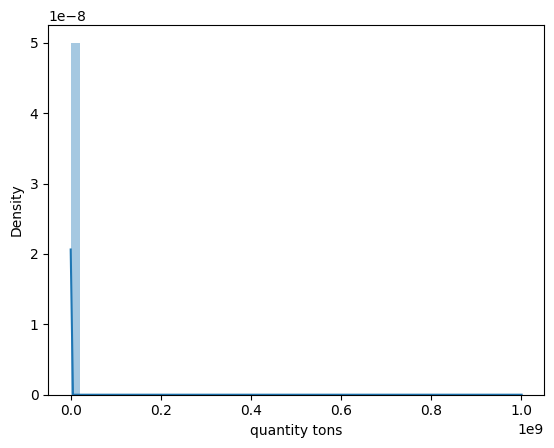

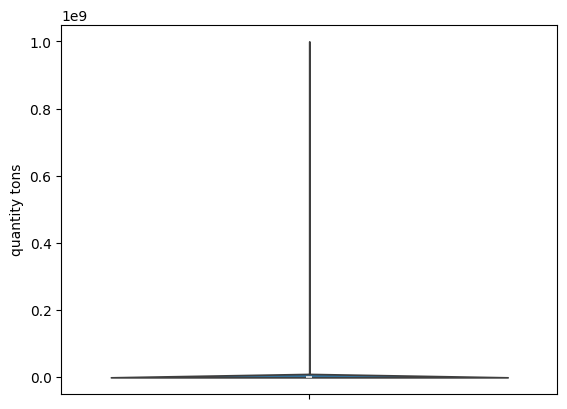

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['country'])


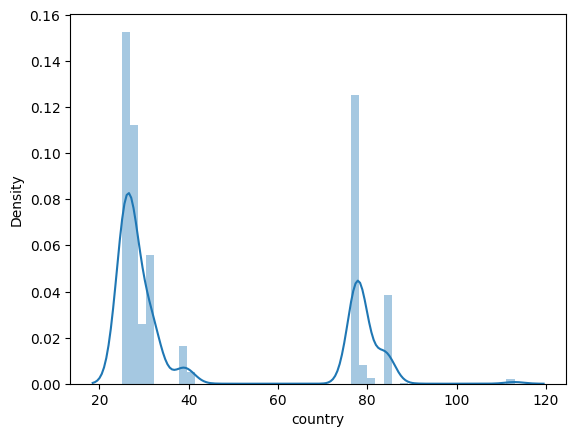

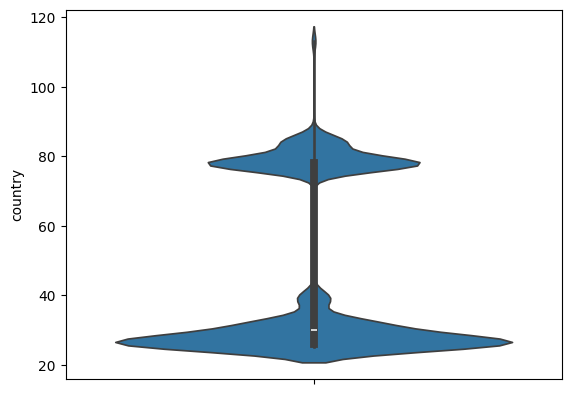

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['application'])


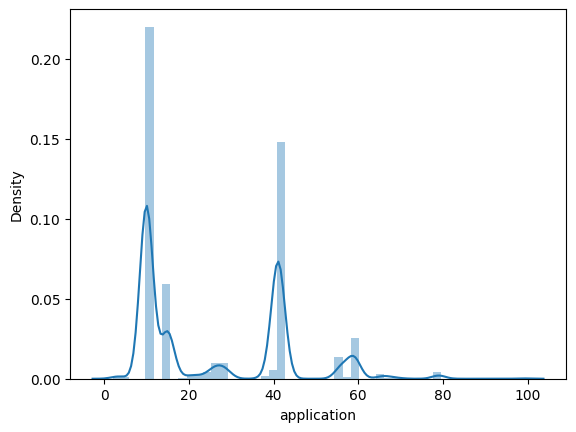

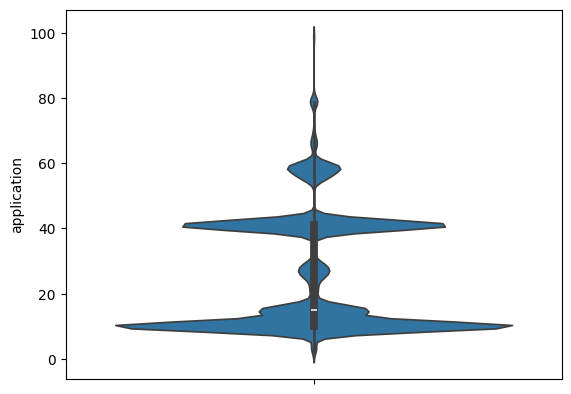

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['thickness'])


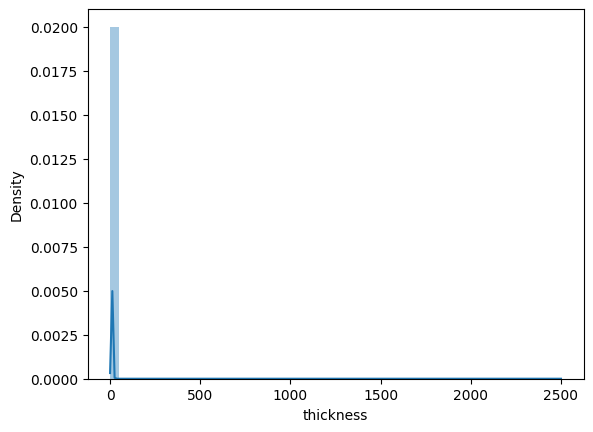

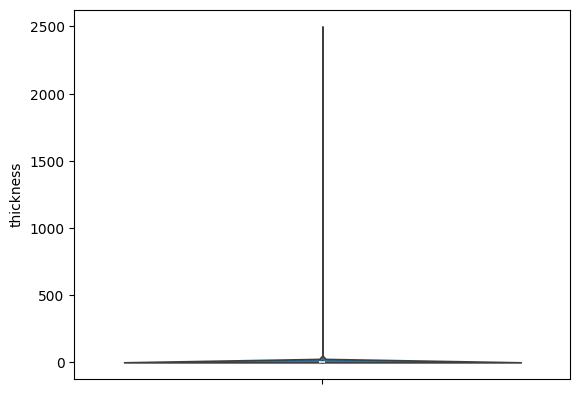

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['width'])


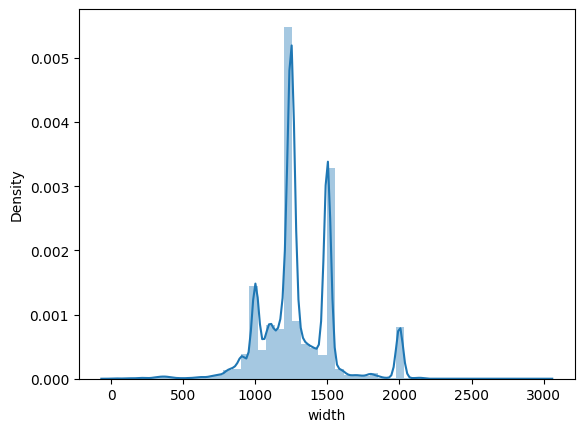

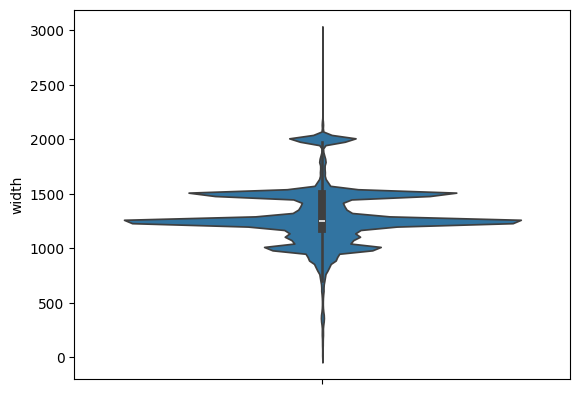

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['selling_price'])


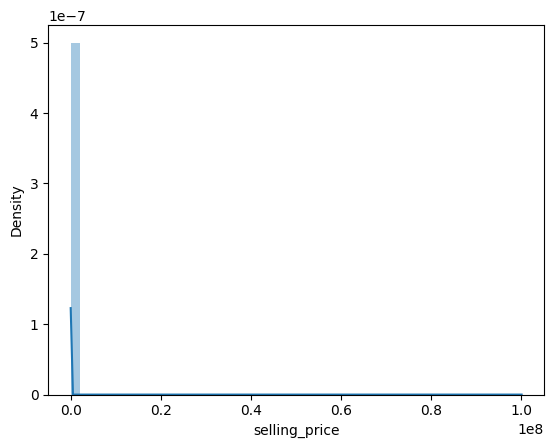

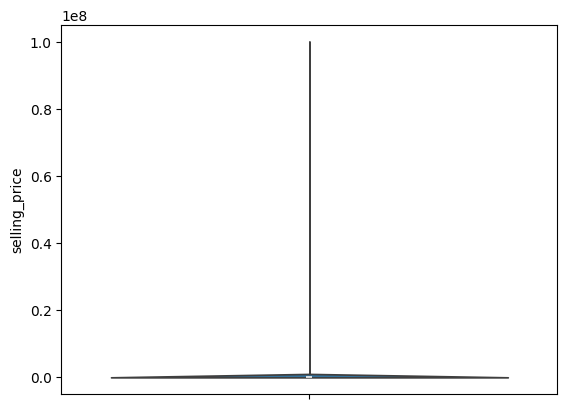

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['item_year'])


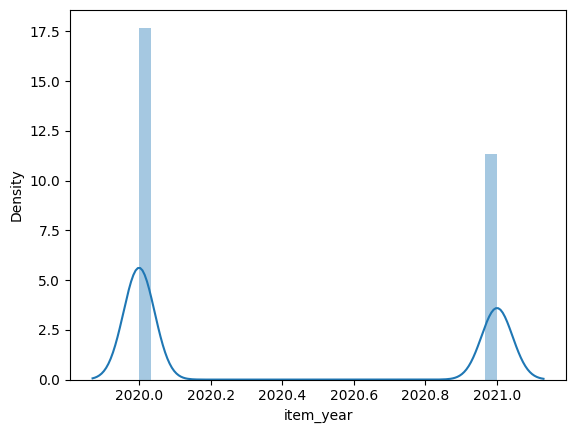

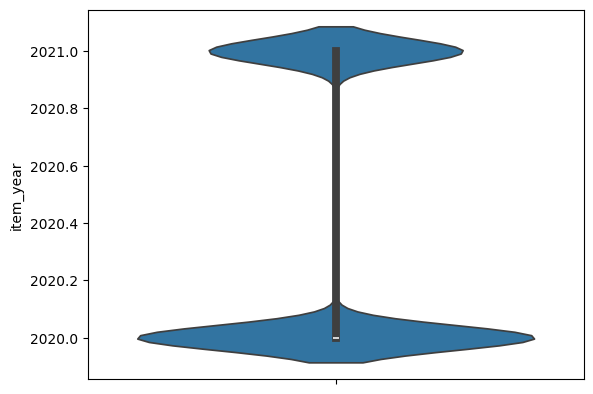

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['item_month'])


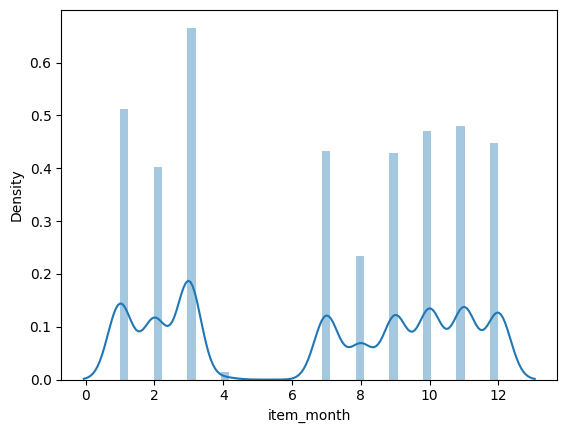

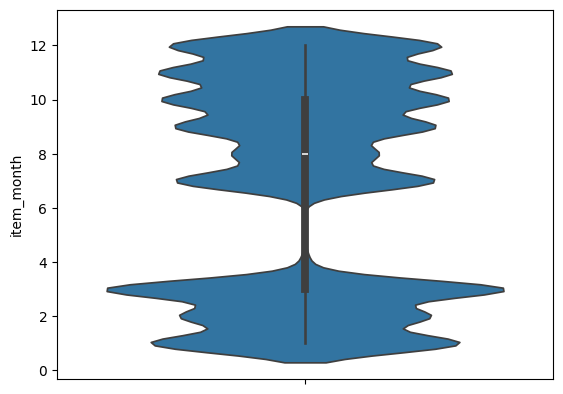

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:42: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['item_day'])


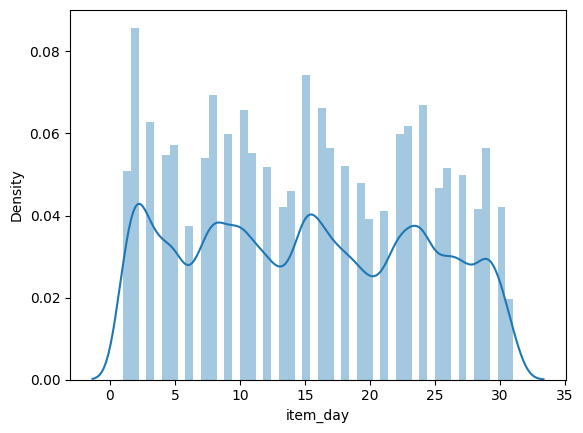

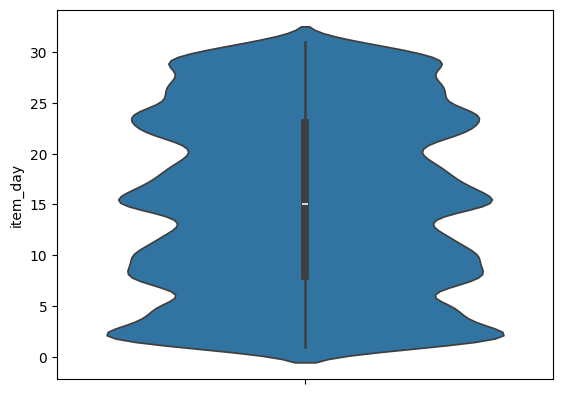

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['delivery_year'])


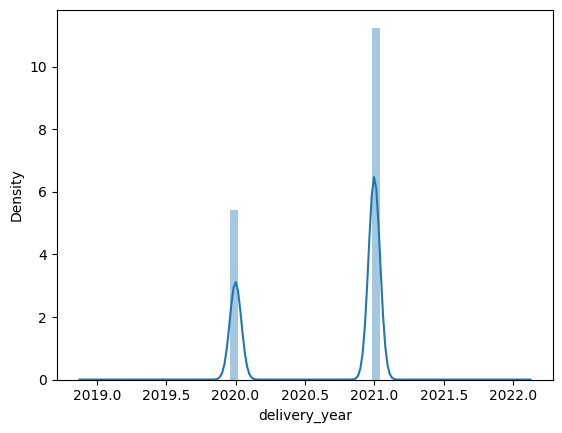

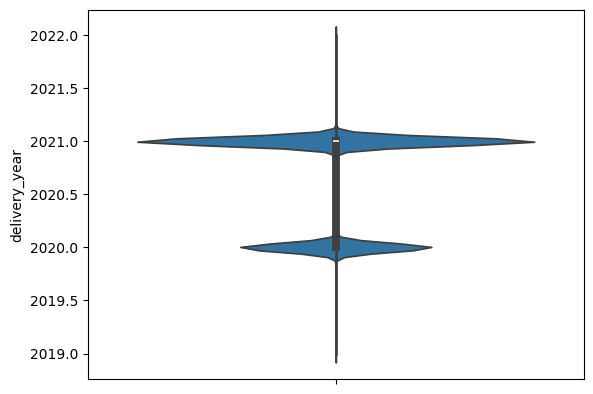

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['delivery_month'])


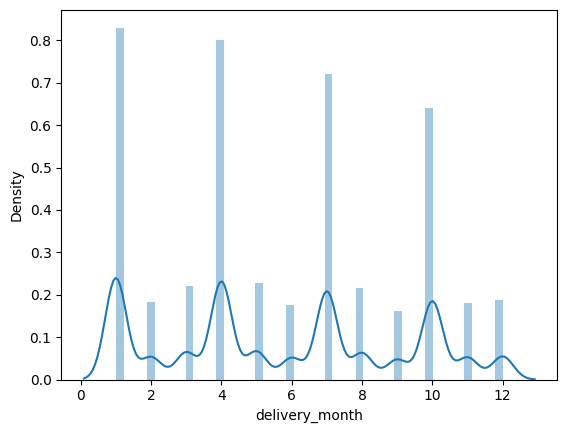

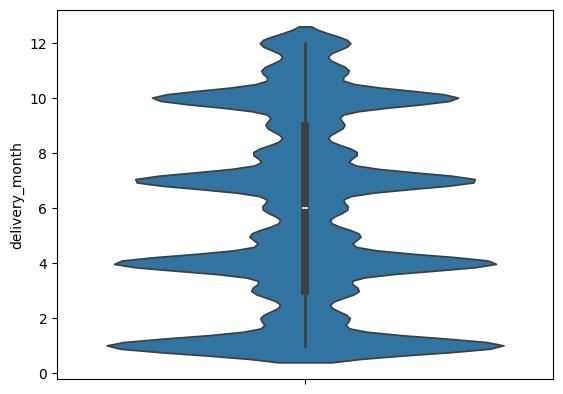

C:\Users\HP\AppData\Local\Temp\ipykernel_13716\3714851755.py:54: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['delivery_day'])
c:\Users\HP\GUVI_PROJ\.venv\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


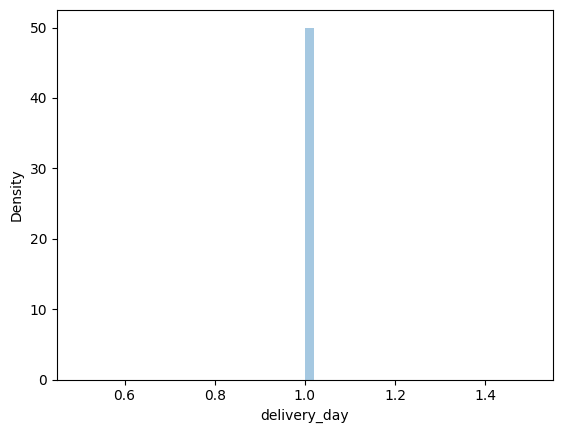

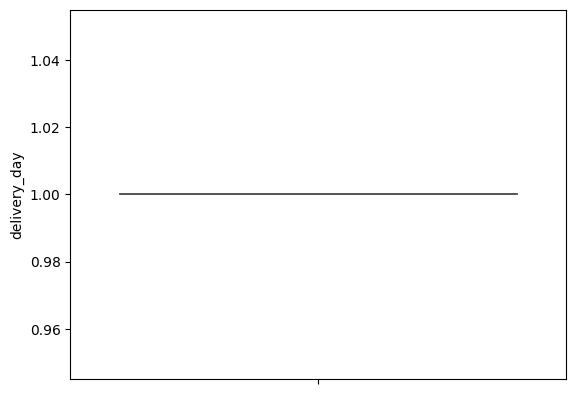

In [15]:
#VISUALIZING SKEWNESS IN THE DATASET USING displot() and viloinplot()

import pandas as pd
df_4=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx")
import seaborn as sns
import matplotlib.pyplot as plt
#Identifying outliers using violinplot
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(df_4['quantity tons'])
plt.show()
sns.violinplot(df_4['quantity tons'])
plt.show()
sns.distplot(df_4['country'])
plt.show()
sns.violinplot(df_4['country'])
plt.show()
sns.distplot(df_4['application'])
plt.show()
sns.violinplot(df_4['application'])
plt.show()
sns.distplot(df_4['thickness'])
plt.show()
sns.violinplot(df_4['thickness'])
plt.show()
sns.distplot(df_4['width'])
plt.show()
sns.violinplot(df_4['width'])
plt.show()
sns.distplot(df_4['selling_price'])
plt.show()
sns.violinplot(df_4['selling_price'])
plt.show()
sns.distplot(df_4['item_year'])
plt.show()
sns.violinplot(df_4['item_year'])
plt.show()
sns.distplot(df_4['item_month'])
plt.show()
sns.violinplot(df_4['item_month'])
plt.show()
sns.distplot(df_4['item_day'])
plt.show()
sns.violinplot(df_4['item_day'])
plt.show()
sns.distplot(df_4['delivery_year'])
plt.show()
sns.violinplot(df_4['delivery_year'])
plt.show()
sns.distplot(df_4['delivery_month'])
plt.show()
sns.violinplot(df_4['delivery_month'])
plt.show()
sns.distplot(df_4['delivery_day'])
plt.show()
sns.violinplot(df_4['delivery_day'])
plt.show()

Column Names: Index(['id', 'quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'selling_price', 'item_year', 'item_month', 'item_day', 'delivery_year',
       'delivery_month', 'delivery_day'],
      dtype='object')
Numeric Columns: Index(['quantity tons', 'customer', 'country', 'application', 'thickness',
       'width', 'product_ref', 'selling_price', 'item_year', 'item_month',
       'item_day', 'delivery_year', 'delivery_month', 'delivery_day'],
      dtype='object')


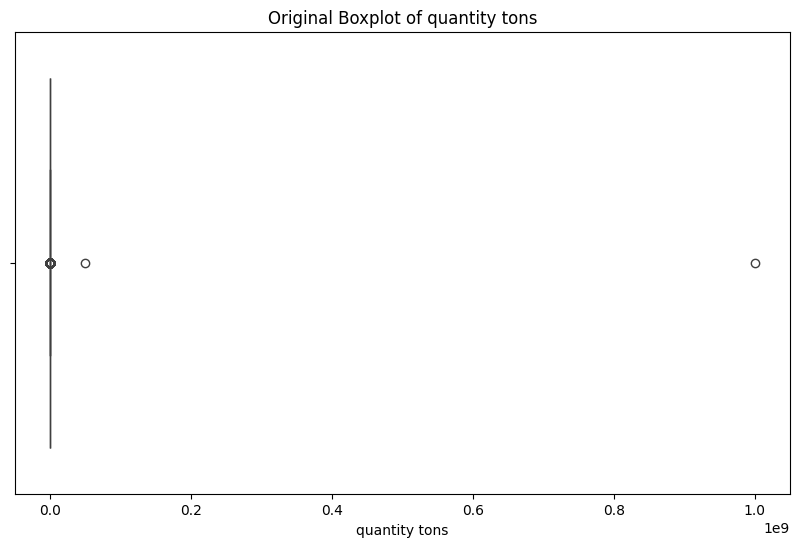

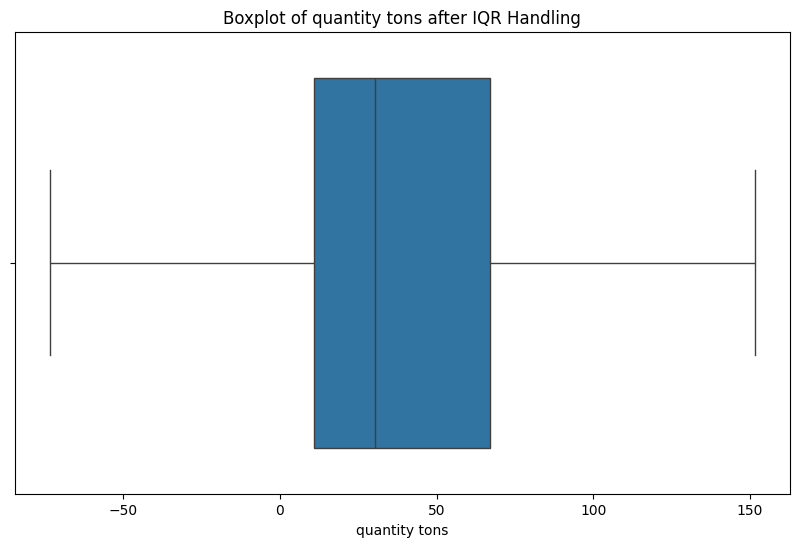

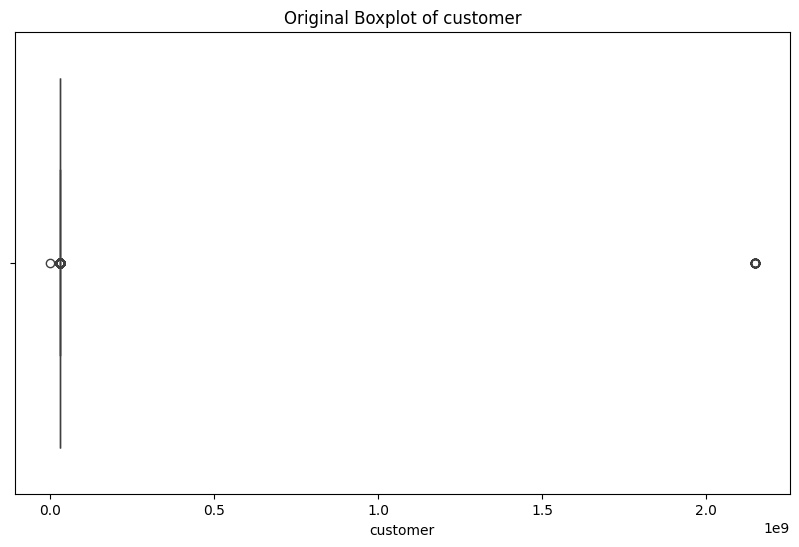

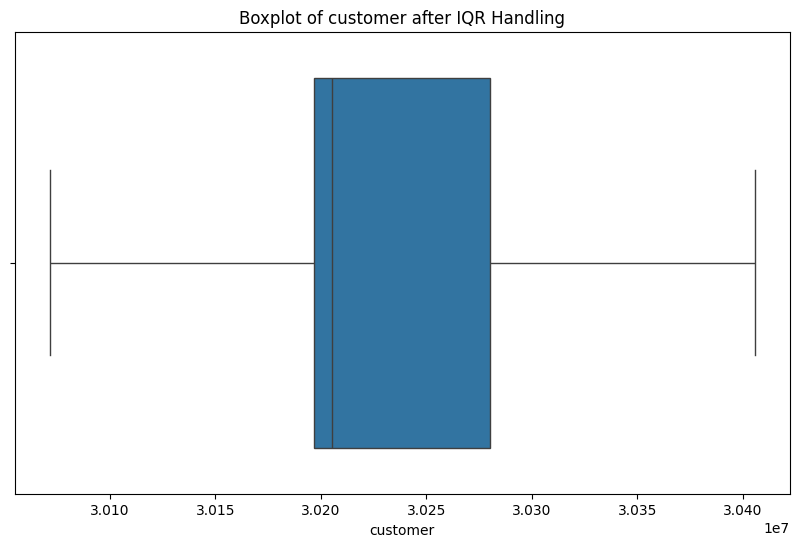

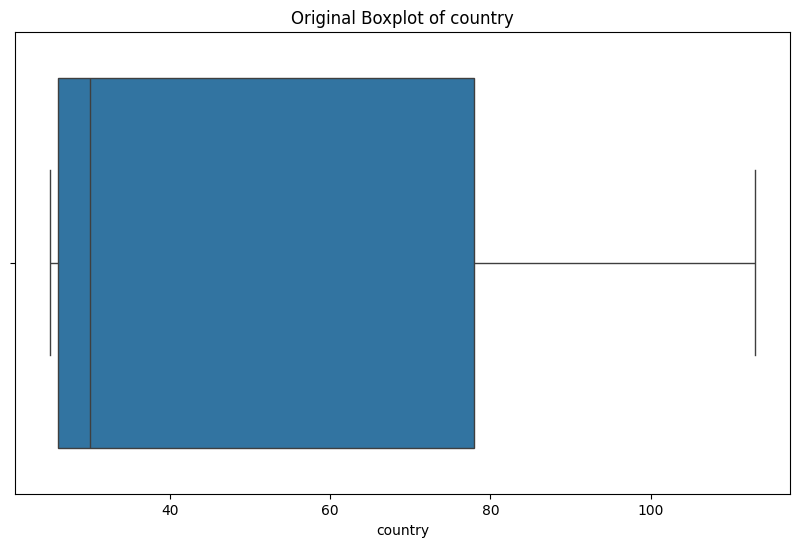

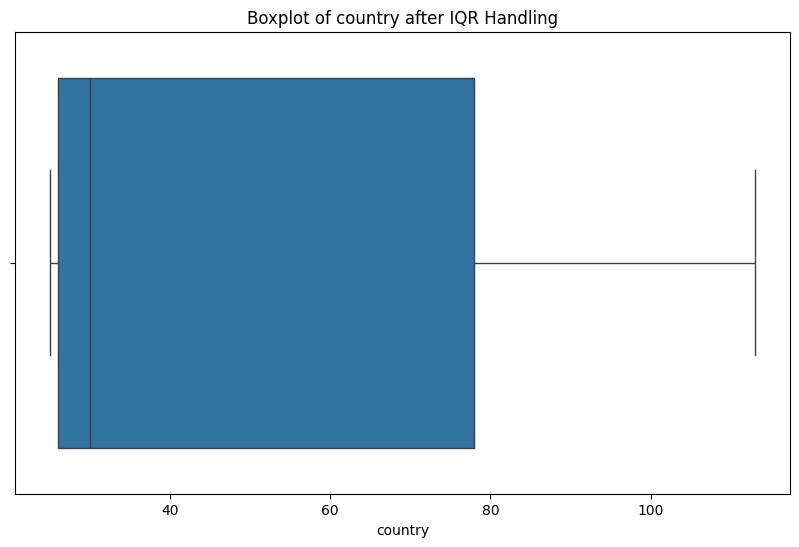

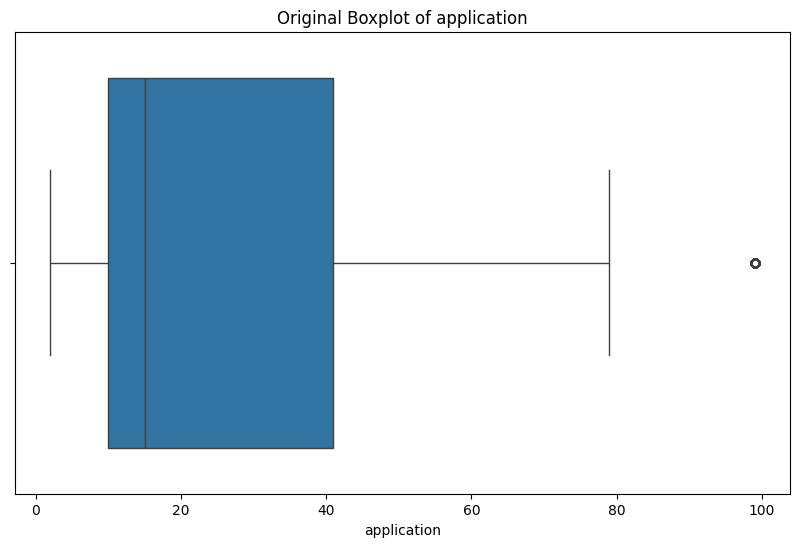

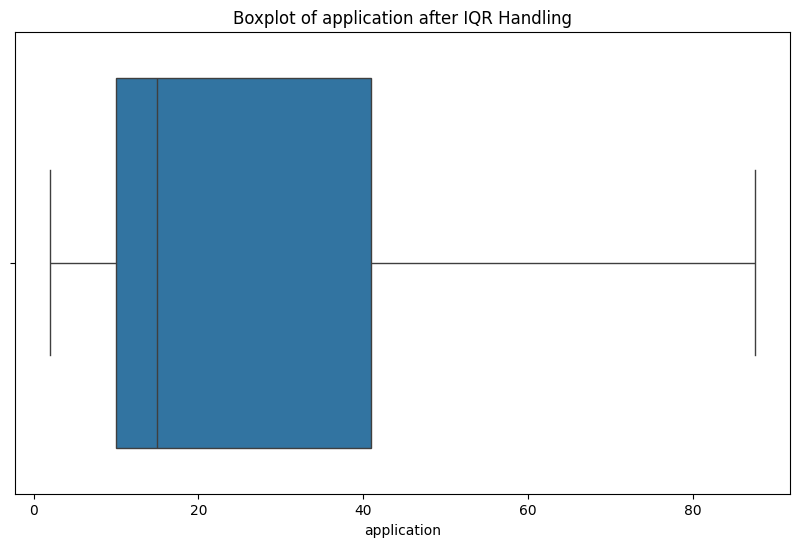

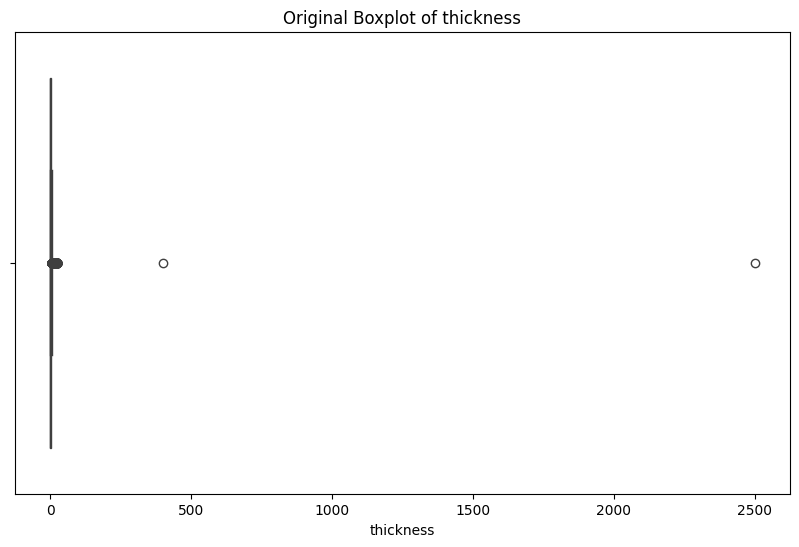

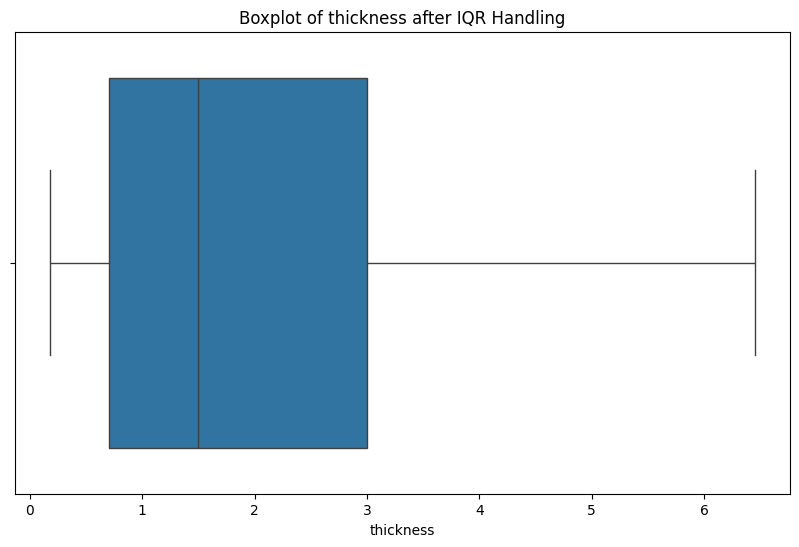

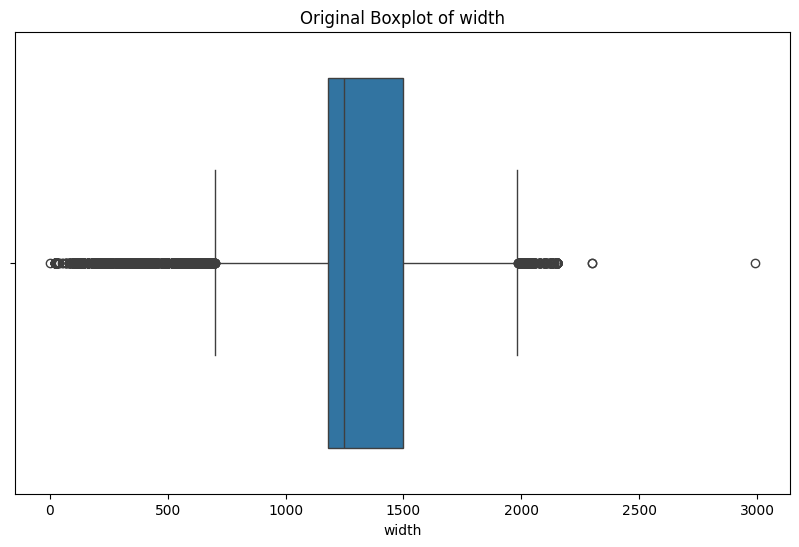

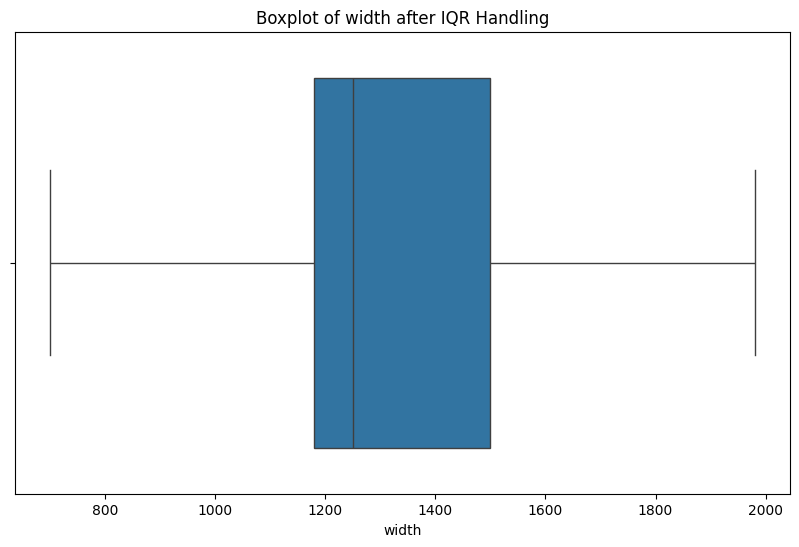

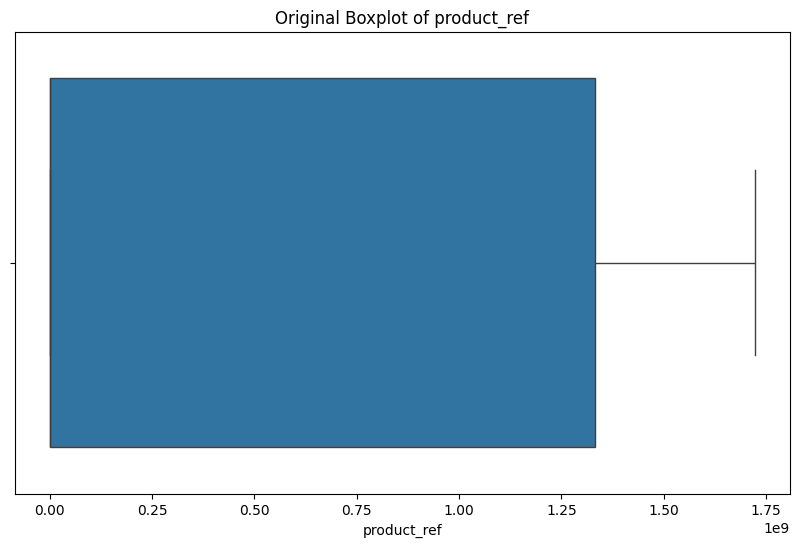

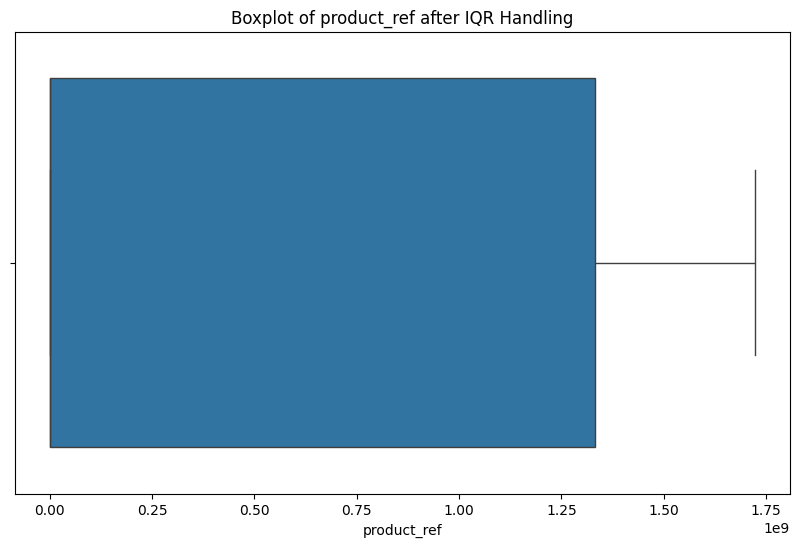

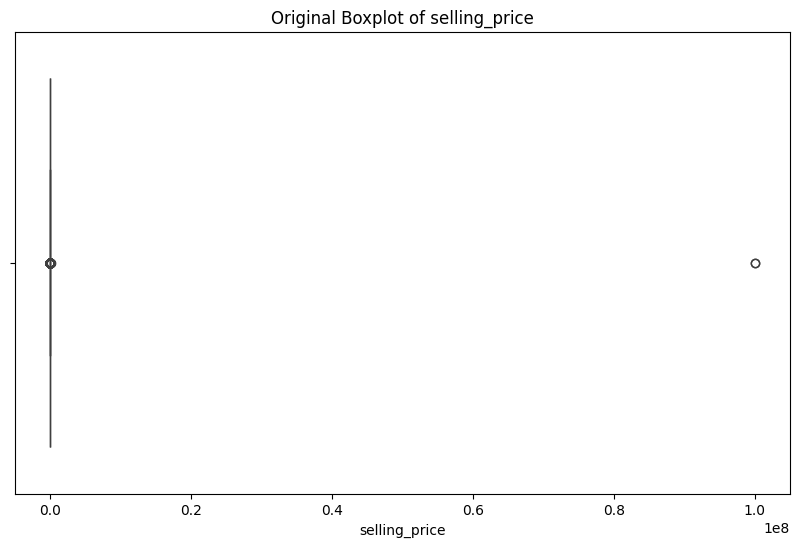

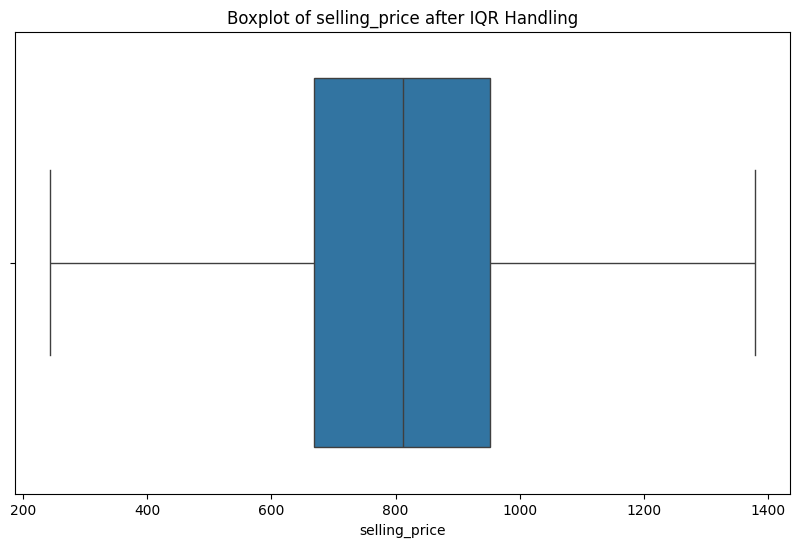

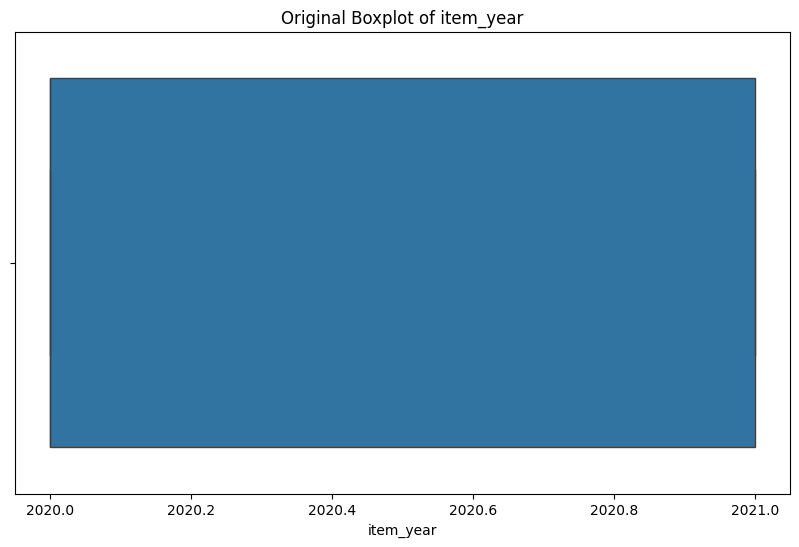

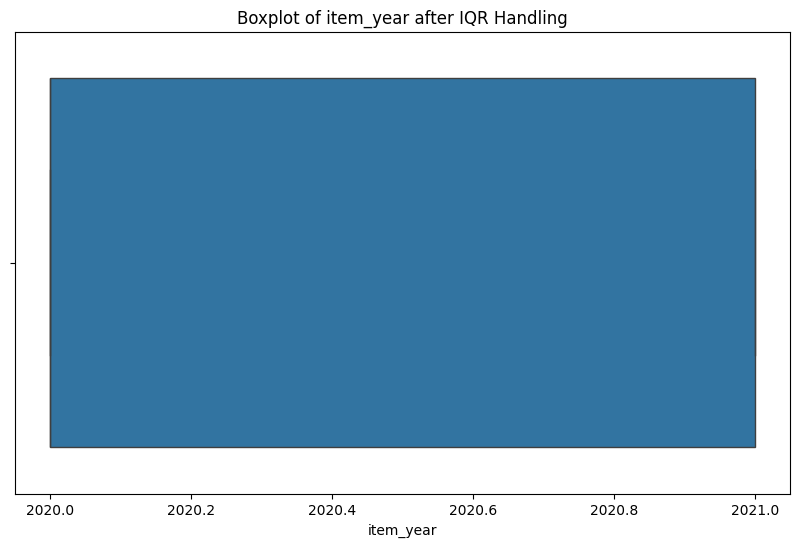

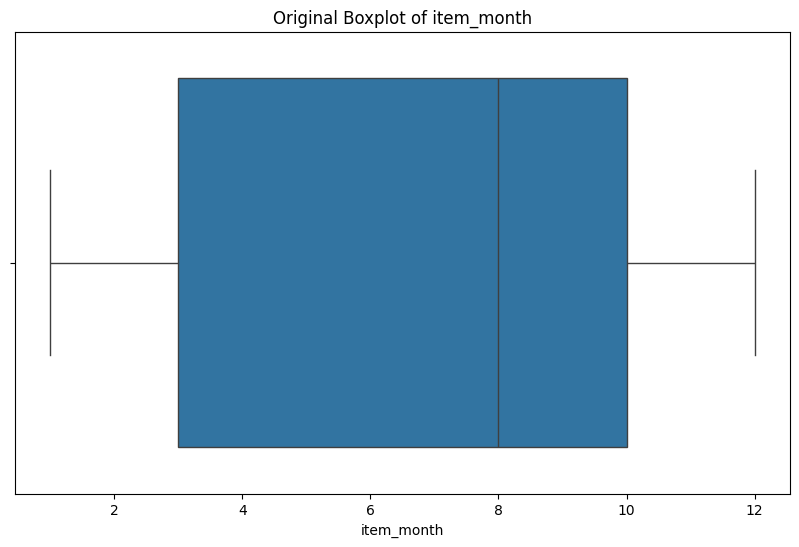

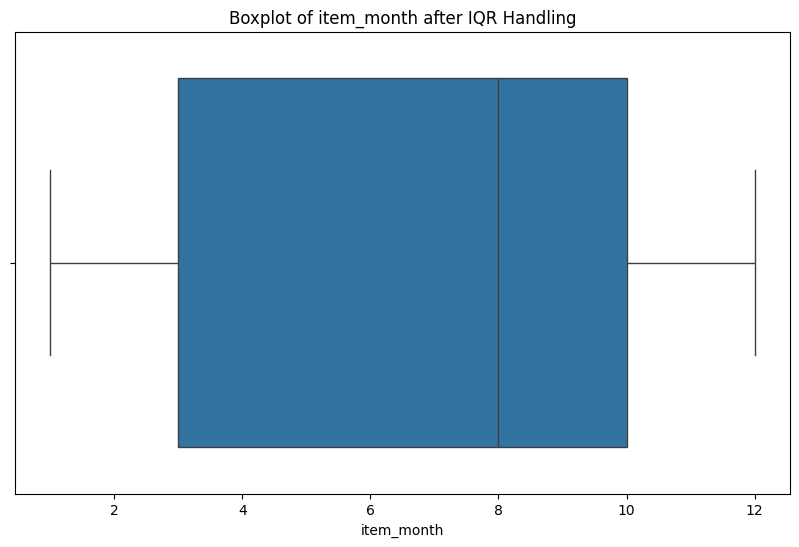

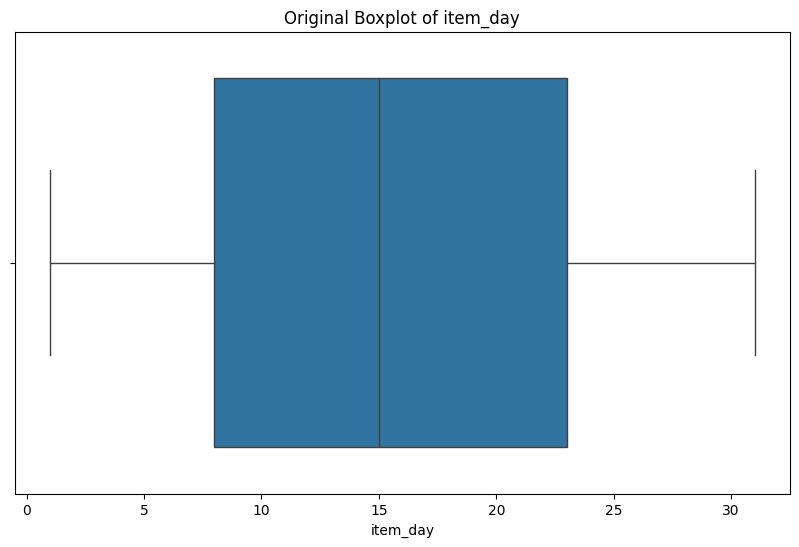

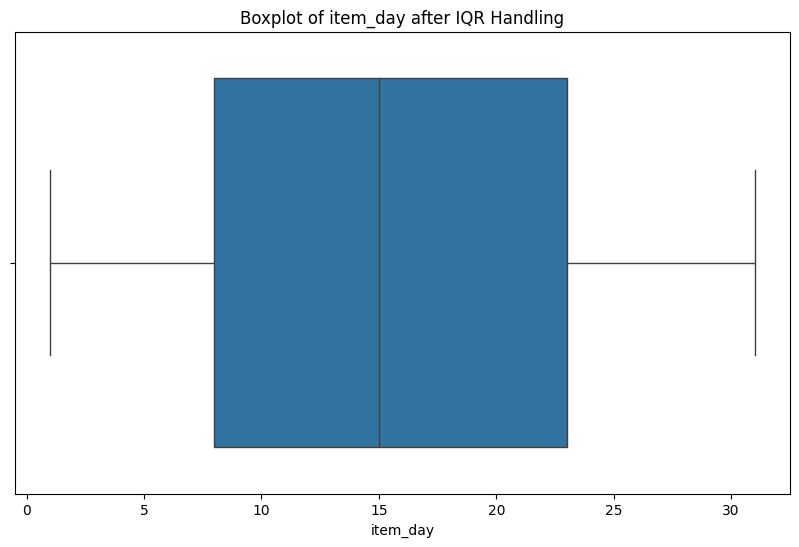

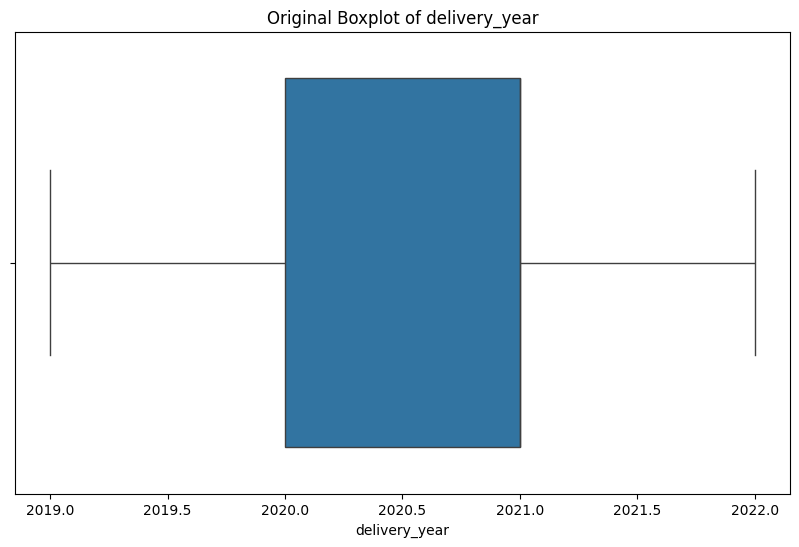

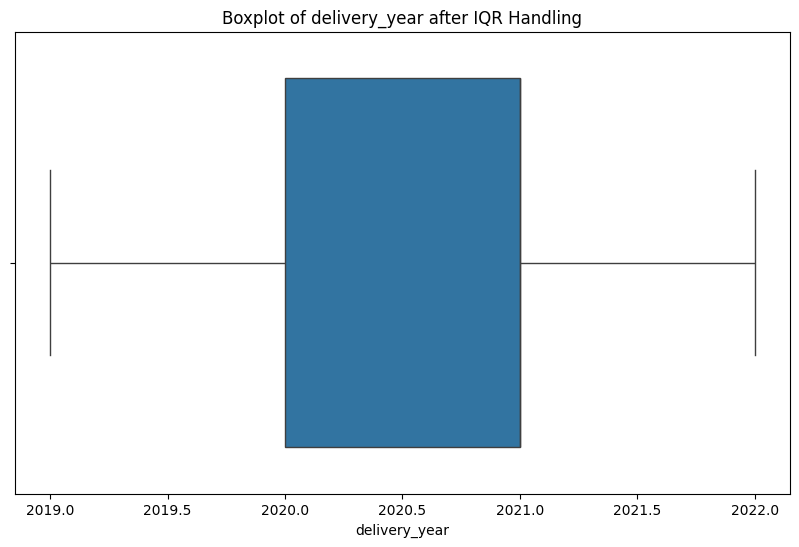

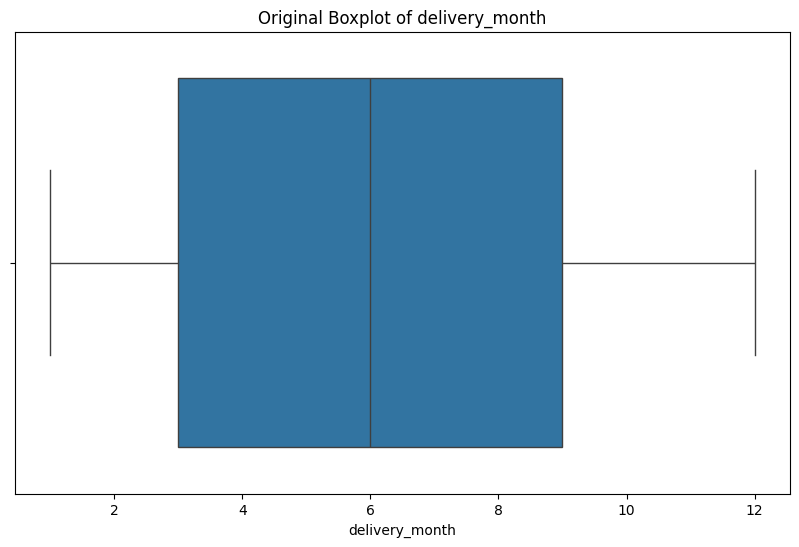

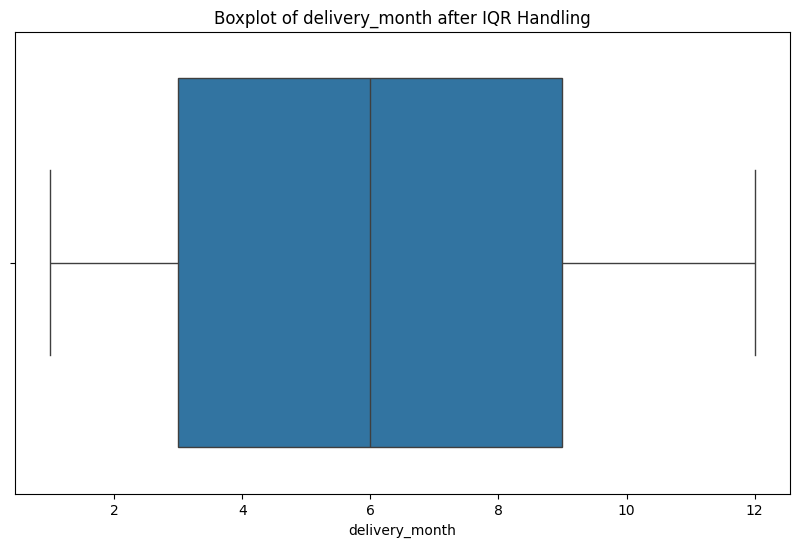

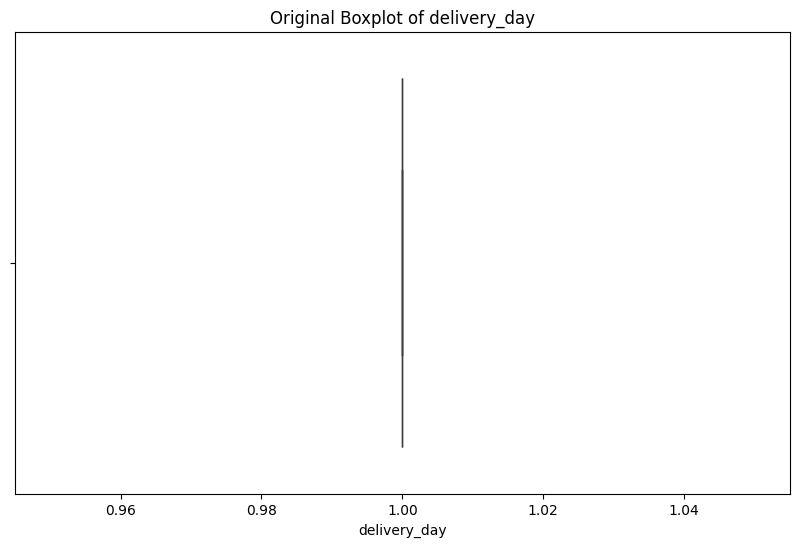

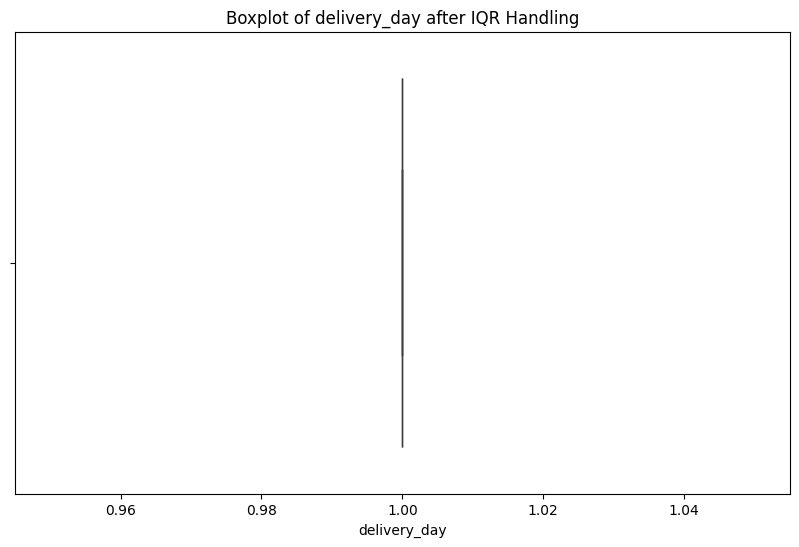

                                     id  quantity tons    customer  country  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE      54.151139  30156308.0     28.0   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425     151.446084  30202938.0     25.0   
2  E140FF1B-2407-4C02-A0DD-780A093B1158     151.446084  30153963.0     30.0   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50     151.446084  30349574.0     32.0   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD     151.446084  30211560.0     28.0   

  status item type  application  thickness   width             material_ref  \
0    Won         W         10.0       2.00  1500.0              DEQ1 S460MC   
1    Won         W         41.0       0.80  1210.0                  DX51D+Z   
2    Won        WI         28.0       0.38   952.0                 S0380700   
3    Won         S         59.0       2.30  1317.0  DX51D+ZM310MAO 2.3X1317   
4    Won         W         10.0       4.00  1980.0          2_S275JR+AR-CL1   

   product_ref  selling_price  item_year  item_mon

In [16]:
#VISUALIZING OUTLIERS IN THE DATASET USING BOXPLOT BEFORE AND AFTER HANDLING OUTLIERS IN THE DATASET

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified.xlsx")

# Print the column names to verify
print("Column Names:", df.columns)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_cols)

# Function to handle outliers using IQR
def handle_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Visualize and handle outliers
for col in numeric_cols:
    # Original boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Original Boxplot of {col}')
    plt.show()
    
    # Handle outliers using IQR
    handle_outliers_iqr(df, col)
    
    # Boxplot after IQR handling
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after IQR Handling')
    plt.show()

# Save the modified dataset to a new file
output_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled.xlsx"
df.to_excel(output_path, index=False)

# For better demonstration, print a few rows of the transformed dataframe
print(df.head())


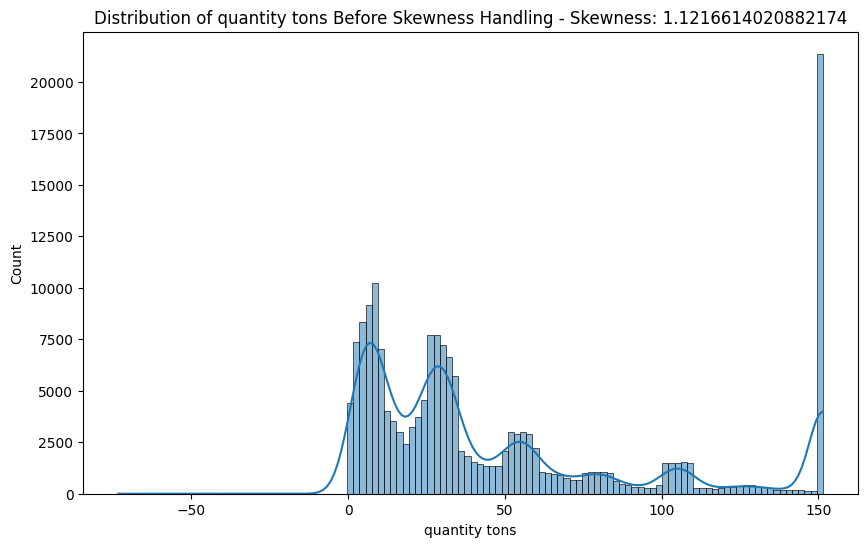

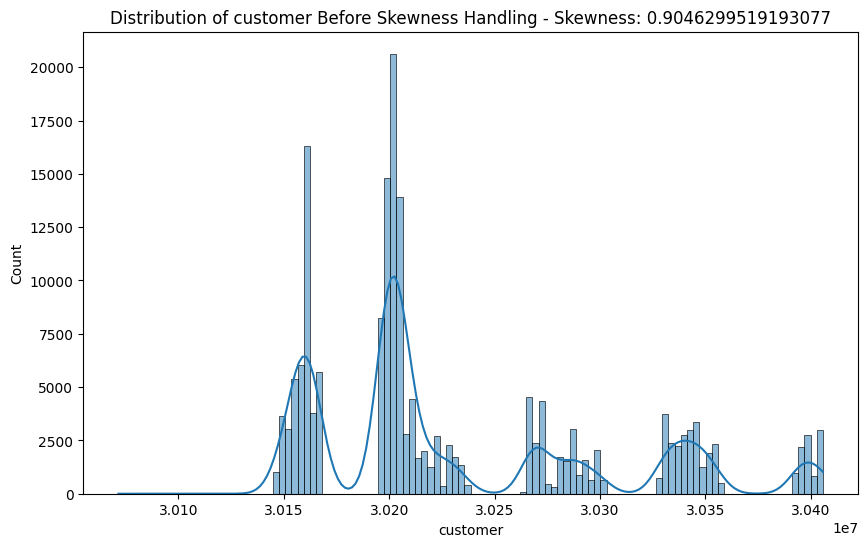

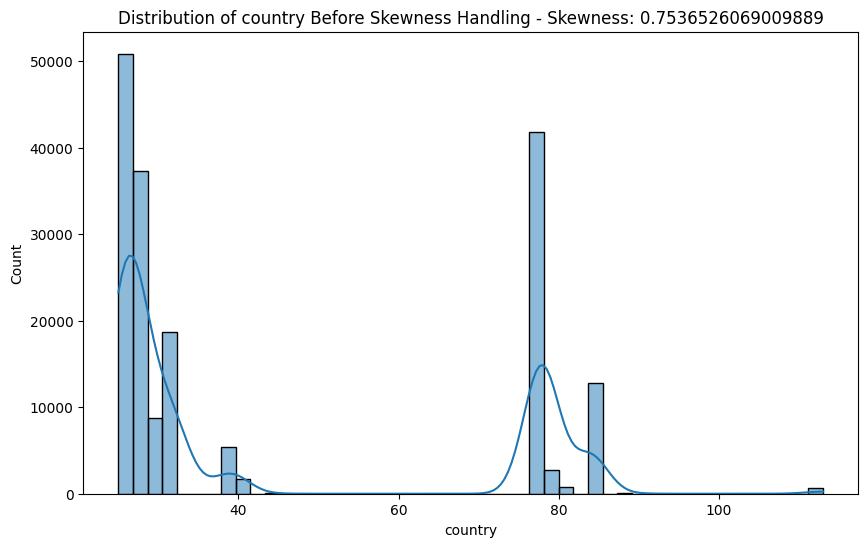

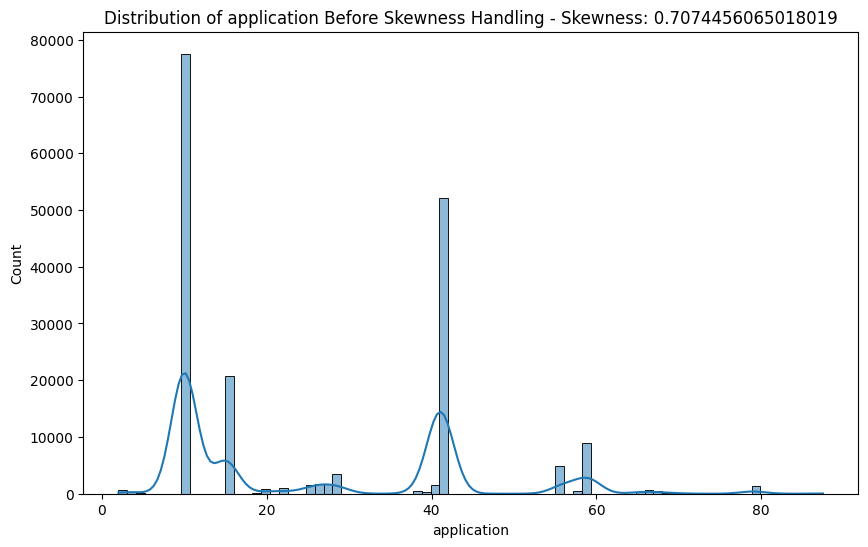

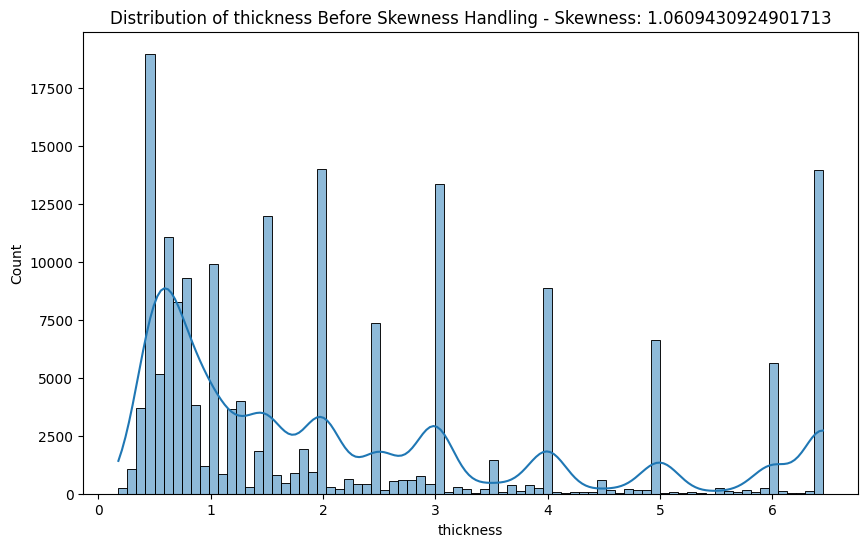

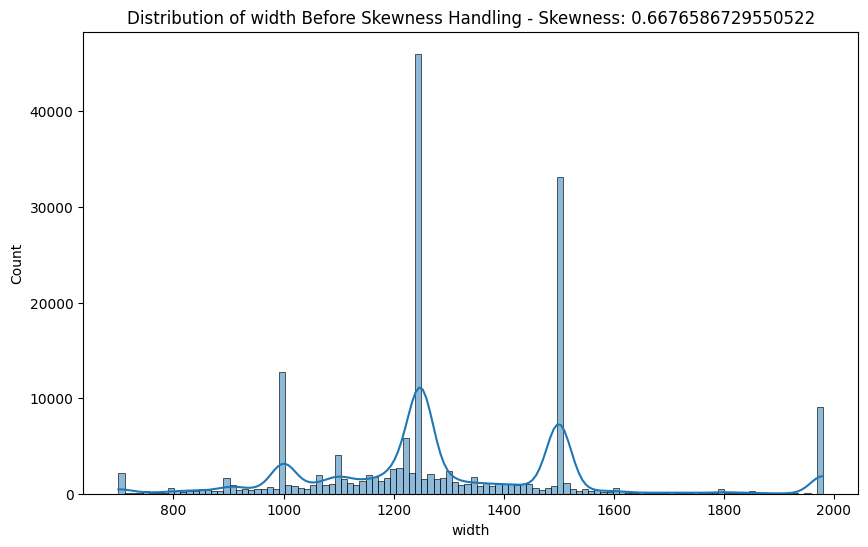

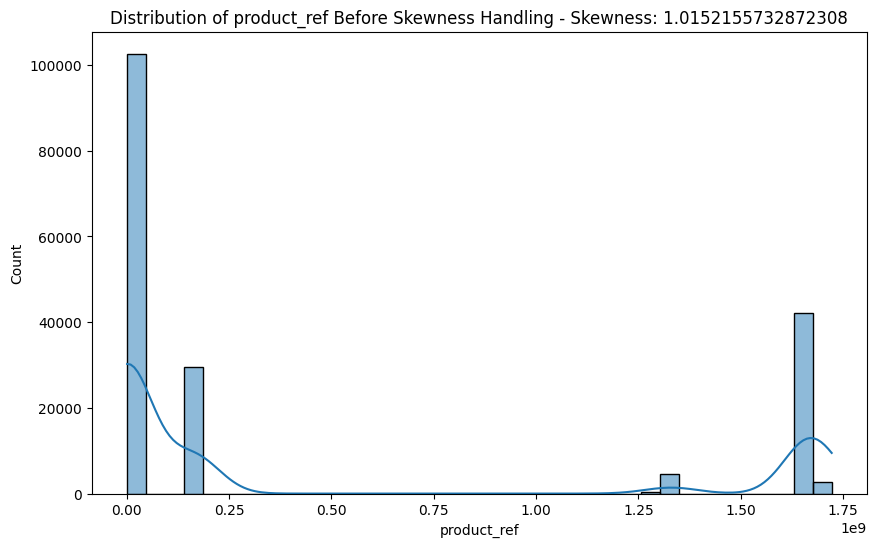

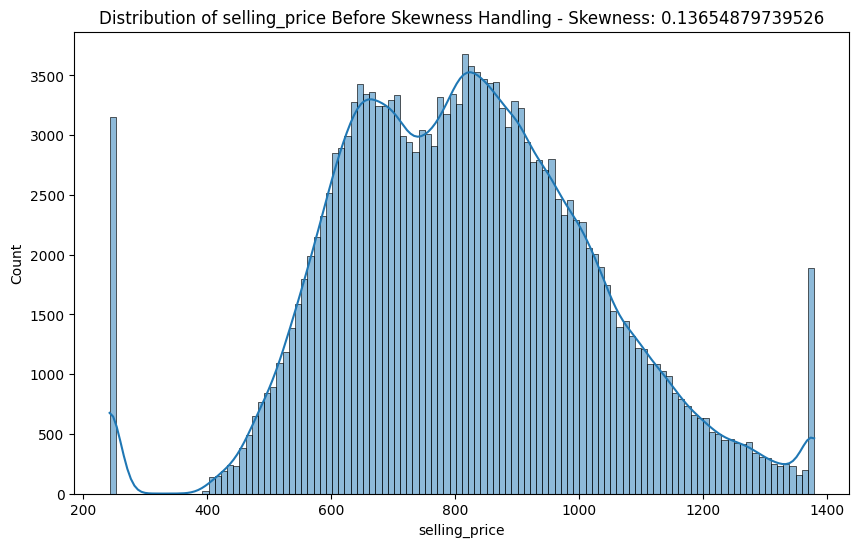

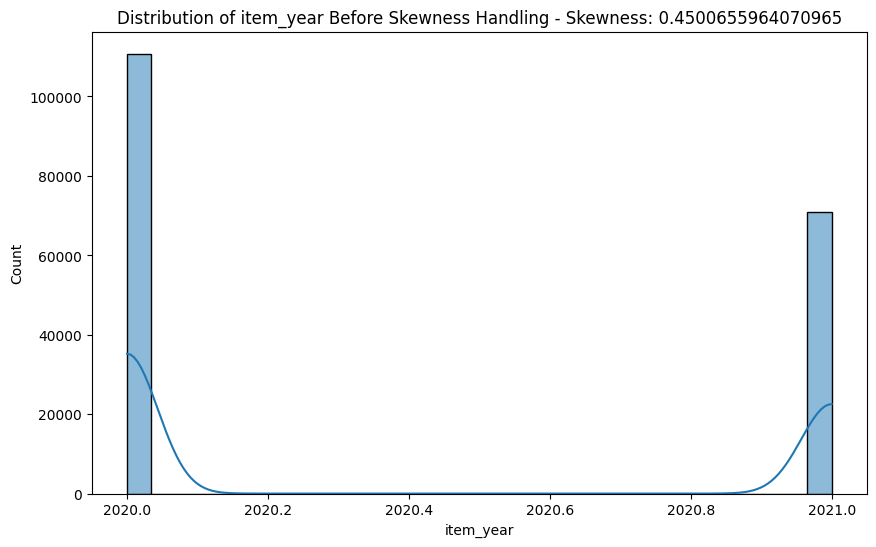

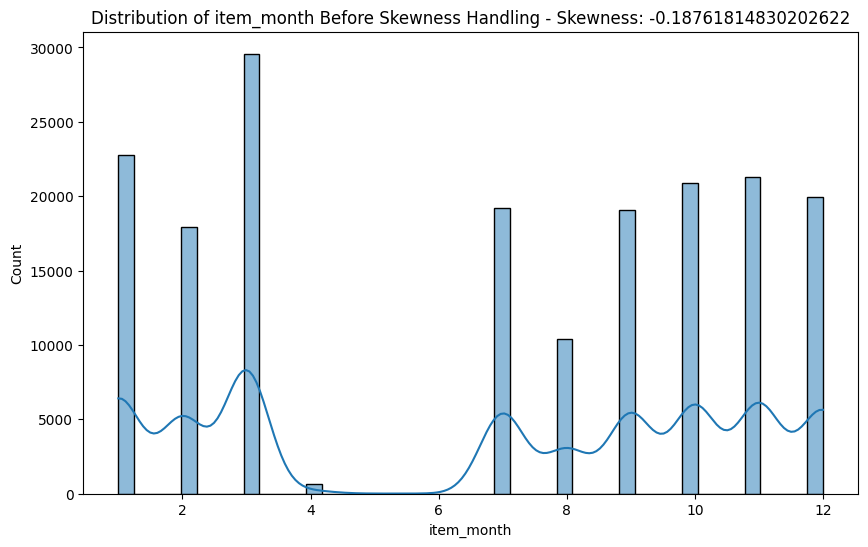

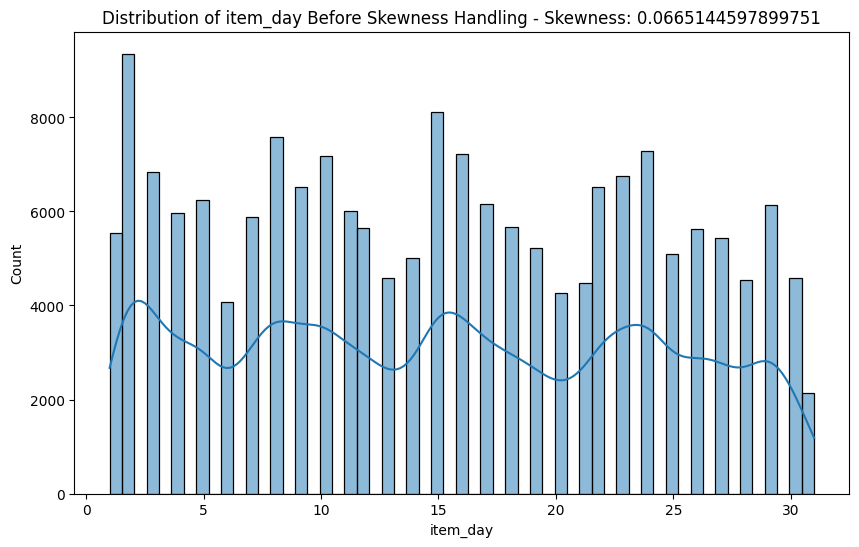

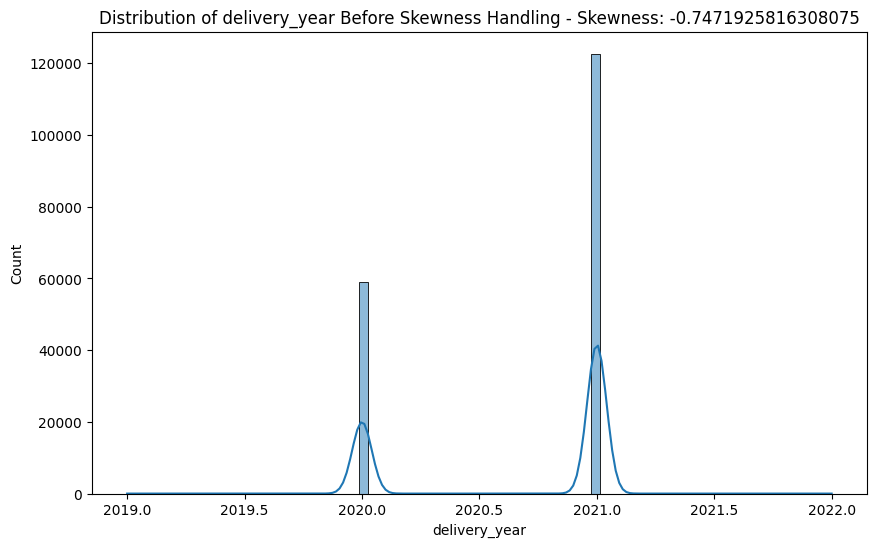

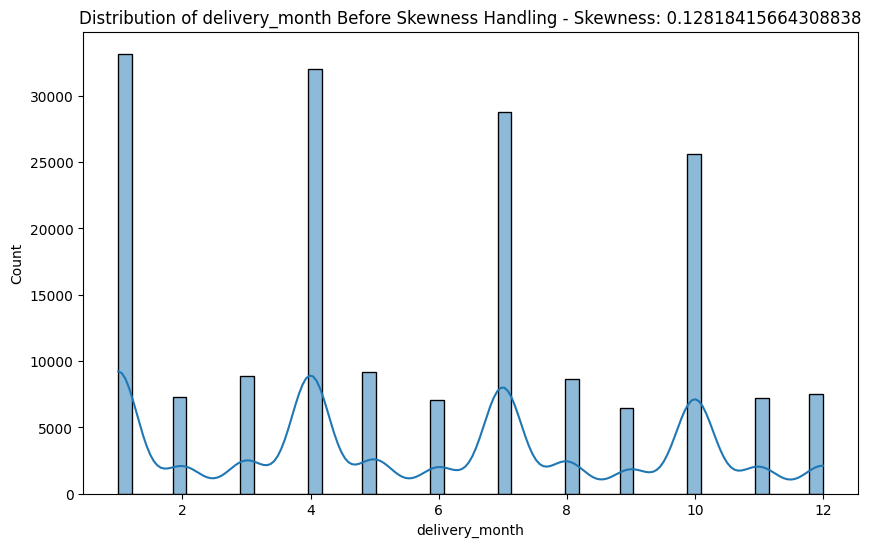

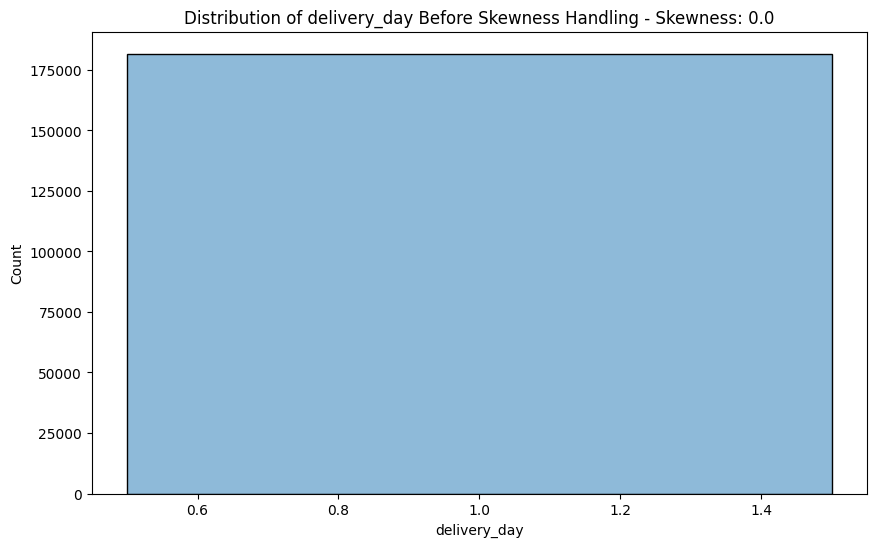

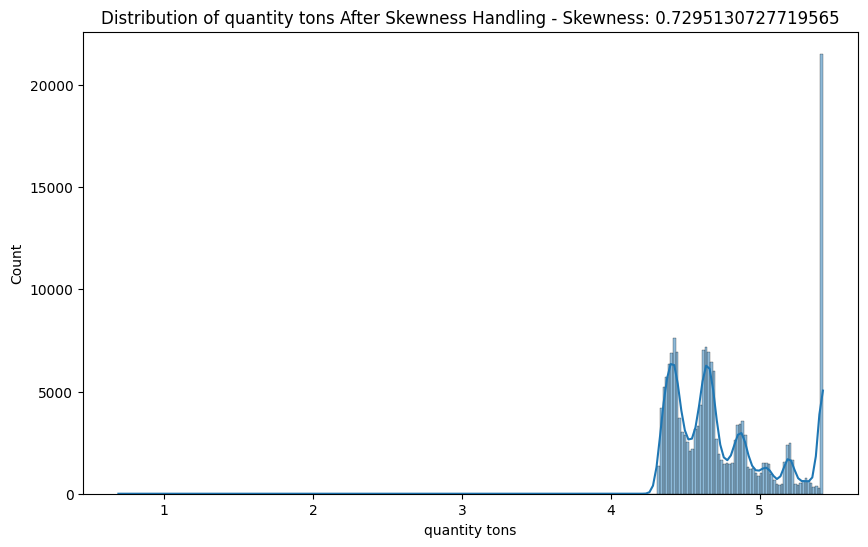

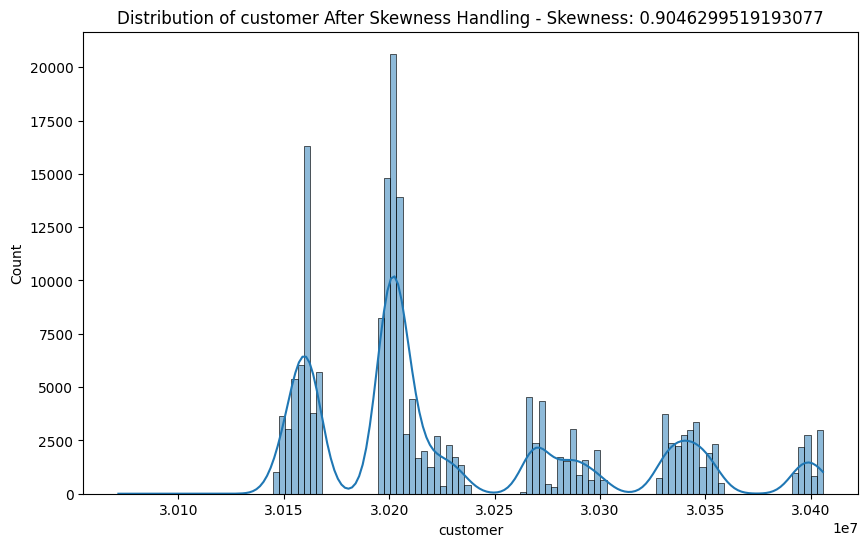

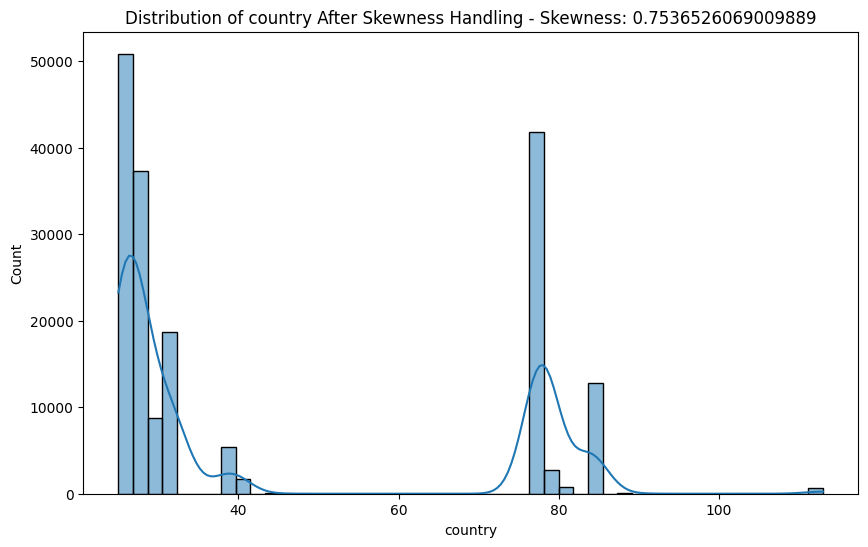

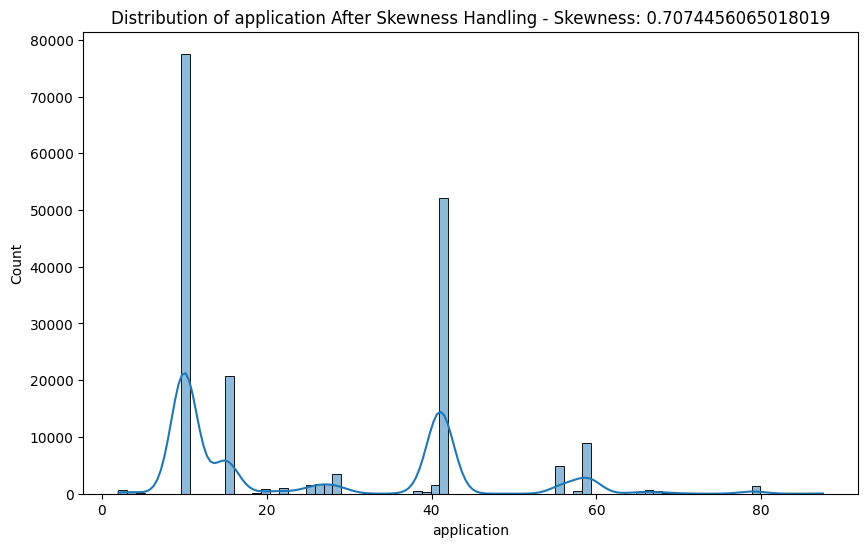

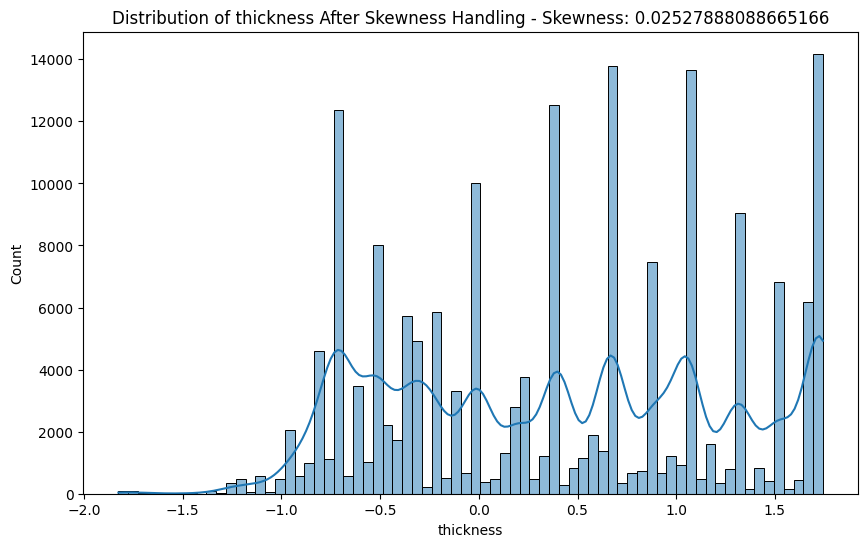

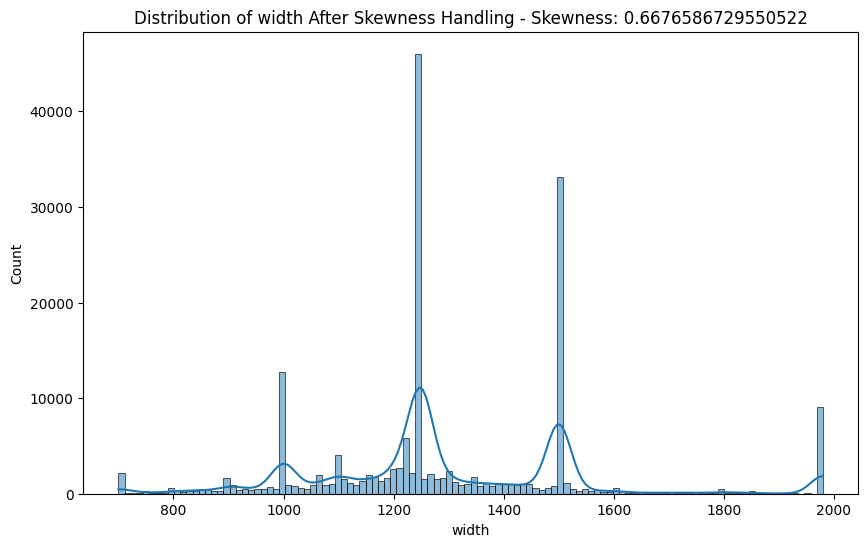

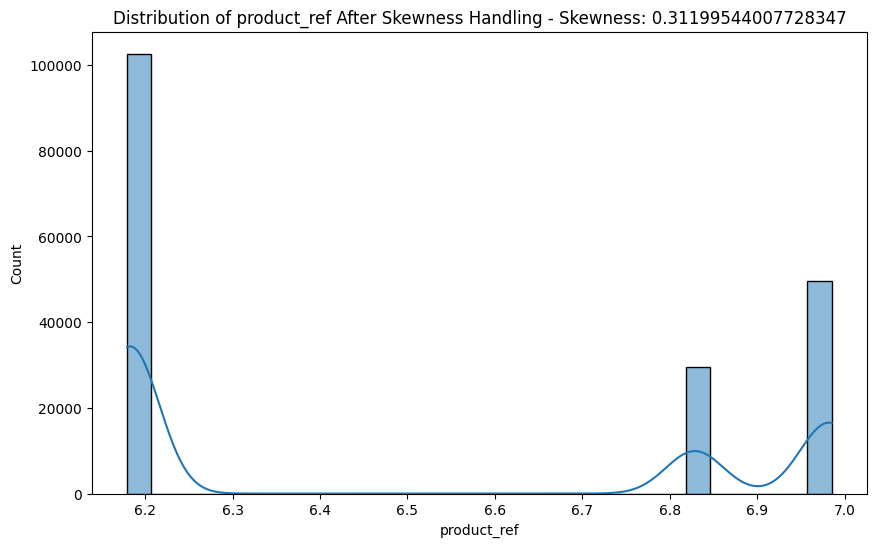

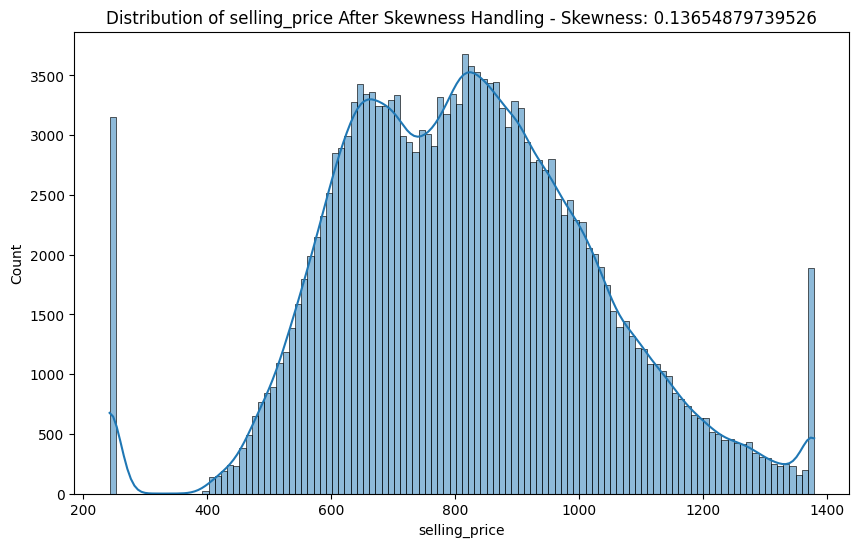

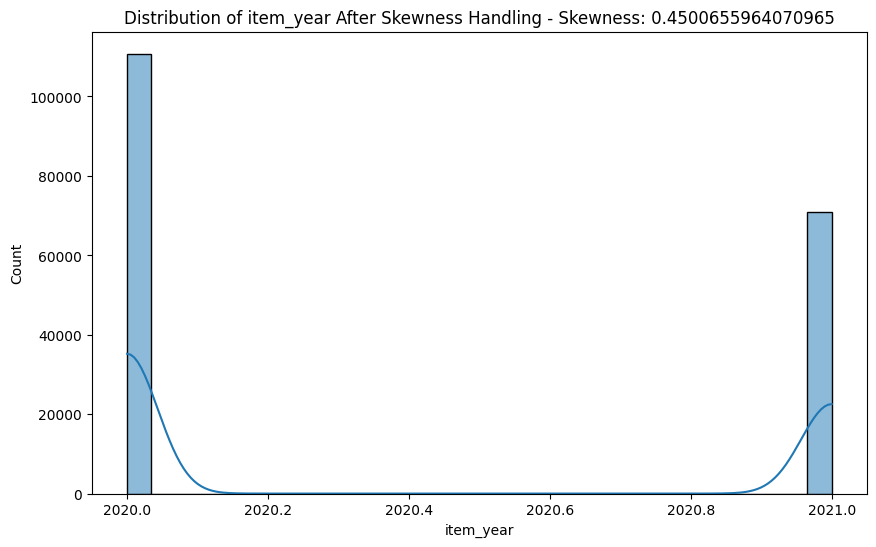

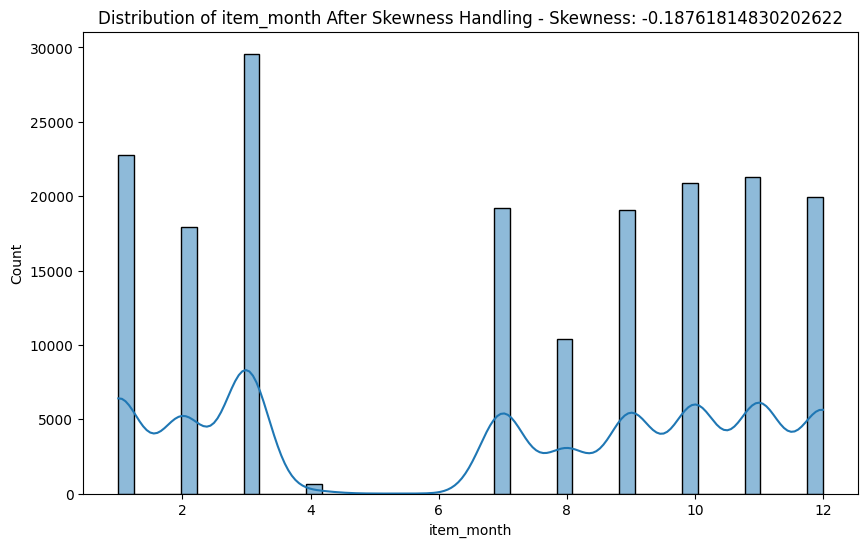

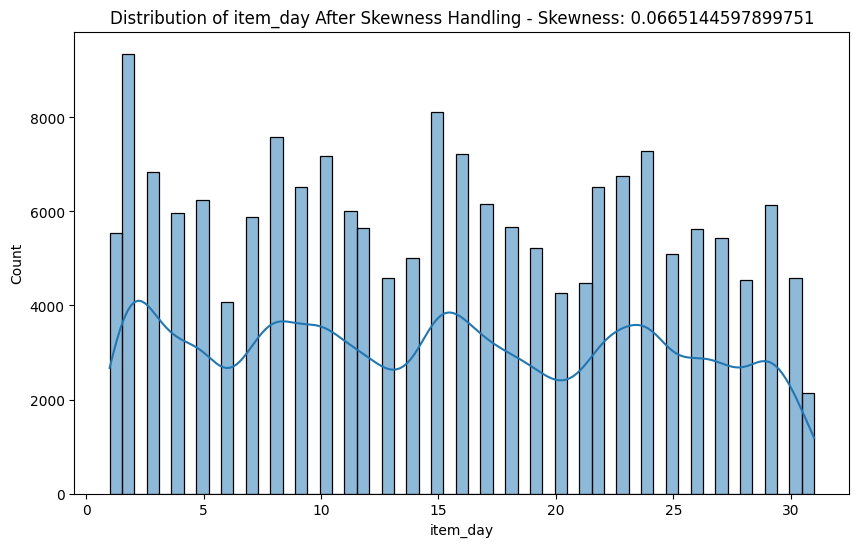

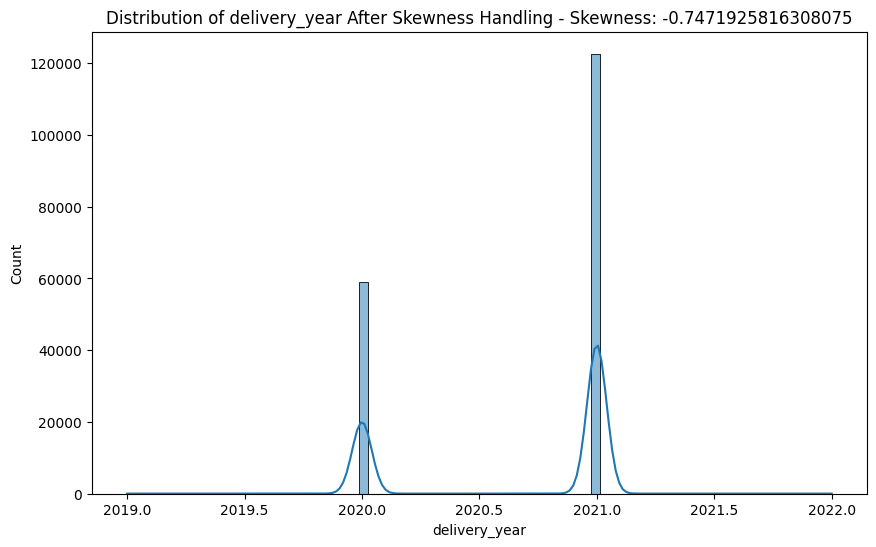

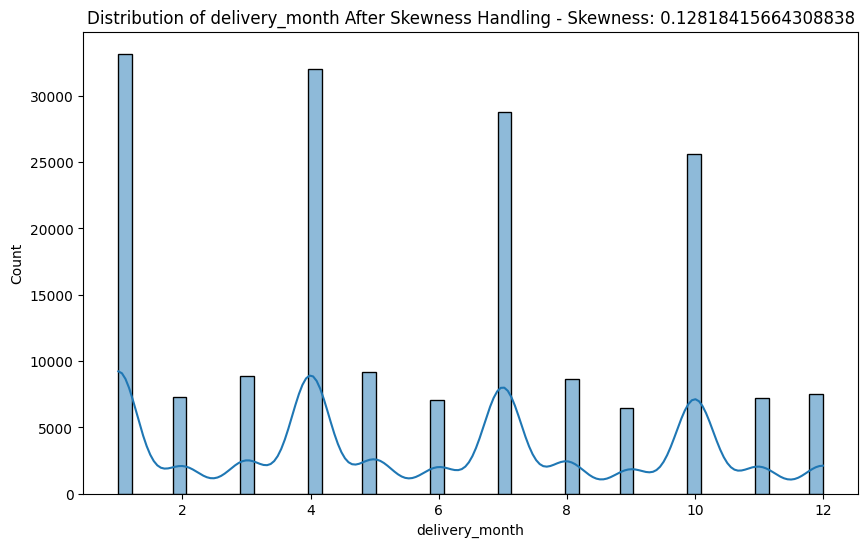

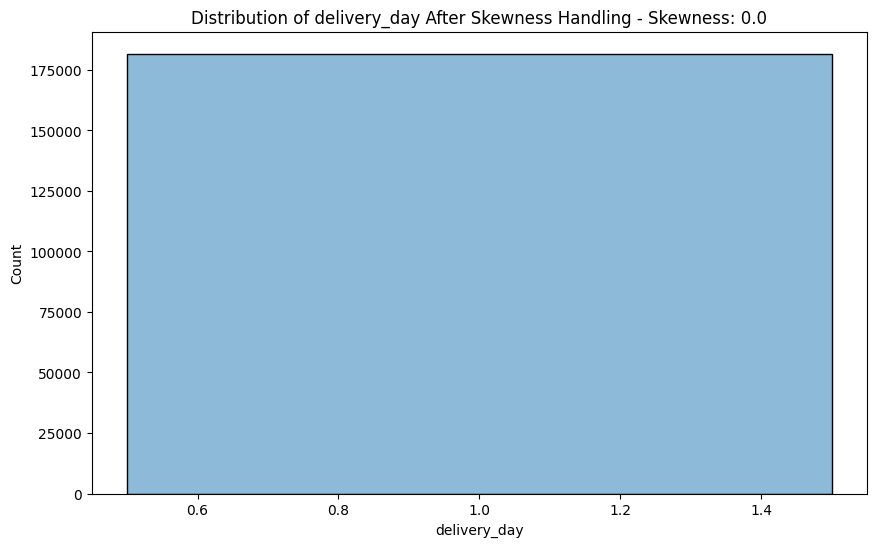

In [17]:
#HANDLING SKEWNESS IN THE DATASET AND VISUALIZING THE DATASET SKEWNESS USING histplot() BEFORE AND AFTER HANDLING SKEWNESS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Load the dataset
df = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled.xlsx")

# Identify continuous numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define a function to plot the distribution and calculate skewness
def plot_skewness(df, cols, title_suffix=""):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col} {title_suffix} - Skewness: {df[col].skew()}')
        plt.show()

# Plot the original distributions and skewness
plot_skewness(df, numerical_cols,"Before Skewness Handling")

# Function to apply transformations to handle skewness
def handle_skewness(df, numerical_cols):
    for col in numerical_cols:
        if col != 'selling_price':  # Avoid transforming the target variable directly
            skewness = df[col].skew()
            if skewness > 1 or skewness < -1:
                if df[col].min() > 0:
                    # Apply Box-Cox transformation for positive values
                    df[col], _ = boxcox(df[col] + 1e-9)  # Adding a small constant to avoid zero values
                else:
                    # Apply log transformation for non-positive values
                    df[col] = np.log1p(df[col] - df[col].min() + 1)
    return df

# Handle skewness
df = handle_skewness(df, numerical_cols,)

# Plot the transformed distributions and skewness

plot_skewness(df, numerical_cols,"After Skewness Handling")

# Save the modified dataset to a new file
output_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled.xlsx"
df.to_excel(output_path, index=False)

# For better demonstration, print a few rows of the transformed dataframe
#print(df.head())


In [25]:
import pandas as pd
df_4=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled.xlsx")
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              181673 non-null  object 
 1   quantity tons   181673 non-null  float64
 2   customer        181673 non-null  int64  
 3   country         181673 non-null  float64
 4   status          181673 non-null  object 
 5   item type       181673 non-null  object 
 6   application     181673 non-null  float64
 7   thickness       181673 non-null  float64
 8   width           181673 non-null  float64
 9   material_ref    181673 non-null  object 
 10  product_ref     181673 non-null  float64
 11  selling_price   181673 non-null  float64
 12  item_year       181673 non-null  float64
 13  item_month      181673 non-null  float64
 14  item_day        181673 non-null  float64
 15  delivery_year   181673 non-null  float64
 16  delivery_month  181673 non-null  float64
 17  delivery_d

In [18]:
import pandas as pd
df_4=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled.xlsx")
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              181673 non-null  object 
 1   quantity tons   181672 non-null  float64
 2   customer        181673 non-null  int64  
 3   country         181673 non-null  float64
 4   status          181673 non-null  object 
 5   item type       181673 non-null  object 
 6   application     181673 non-null  float64
 7   thickness       181673 non-null  float64
 8   width           181673 non-null  float64
 9   material_ref    181673 non-null  object 
 10  product_ref     181673 non-null  float64
 11  selling_price   181673 non-null  float64
 12  item_year       181670 non-null  float64
 13  item_month      181670 non-null  float64
 14  item_day        181670 non-null  float64
 15  delivery_year   181671 non-null  float64
 16  delivery_month  181671 non-null  float64
 17  delivery_d

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled.xlsx")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Define target variable for classification
target_variable_classification = 'status'

# Function to analyze relationship and apply suitable encoding for classification
def encode_column_classification(df, column, target, top_n=10):
    # Create contingency table
    contingency_table = pd.crosstab(df[column], df[target])
    # Perform Chi-Square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test between {column} and {target}: p-value = {p}")
    
    # If high cardinality, use Ordinal Encoding
    if df[column].nunique() > top_n:
        print(f"High cardinality detected in {column}. Applying Ordinal Encoding.")
        encoder = OrdinalEncoder()
        df[column] = encoder.fit_transform(df[[column]])
    else:
        # Choose encoding method based on p-value
        if p < 0.05:  # Significant relationship
            # Apply ordinal encoding
            encoder = OrdinalEncoder()
            df[column] = encoder.fit_transform(df[[column]])
        else:
            # Apply one-hot encoding with top N categories
            df_top_n = df[column].value_counts().index[:top_n]
            df[column] = df[column].apply(lambda x: x if x in df_top_n else 'Other')
            df = pd.get_dummies(df, columns=[column], drop_first=True)
    return df

# Apply encoding based on target variable for classification
for col in categorical_cols:
    df = encode_column_classification(df, col, target_variable_classification)

# Save the modified dataset to a new file
output_path_classification =  "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded.xlsx"
df.to_excel(output_path_classification, index=False)

# For better demonstration, print a few rows of the transformed dataframe
print(df.head())


Categorical Columns: Index(['id', 'status', 'item type', 'material_ref'], dtype='object')
Spearman correlation between id and selling_price: -0.0015506213479110989
Spearman correlation between status and selling_price: 0.08198671312725649
Spearman correlation between item type and selling_price: 0.101697898117168
Spearman correlation between material_ref and selling_price: -0.0036625591198421693
   quantity tons  customer  country  application  thickness   width  \
0       4.863417  30156308     28.0         10.0   0.675994  1500.0   
1       5.423892  30202938     25.0         41.0  -0.224961  1210.0   
2       5.423892  30153963     30.0         28.0  -1.002383   952.0   
3       5.423892  30349574     32.0         59.0   0.808224  1317.0   
4       5.423892  30211560     28.0         10.0   1.318808  1980.0   

   product_ref  selling_price  item_year  item_month  ...  status_Lost  \
0     6.983347         854.00     2021.0         4.0  ...        False   
1     6.983275        1047

In [2]:
#Encode categorical variables using suitable techniques, such as one-hot
#encoding, label encoding, or ordinal encoding, based on their nature and
#relationship with the target variable, FOR REGRESSION MODELING DATASET


import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import spearmanr

# Load the dataset
df = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled.xlsx")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Define target variable for regression
target_variable_regression = 'selling_price'

# Function to reduce high cardinality
def reduce_cardinality(df, column, threshold=0.01):
    # Calculate the frequency of each category
    freq = df[column].value_counts(normalize=True)
    # Identify rare categories
    rare_categories = freq[freq < threshold].index
    # Replace rare categories with 'Other'
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_categories else x)
    return df

# Function to analyze relationship and apply suitable encoding
def encode_column(df, column, target_reg):
    if column in categorical_cols:  # Only encode categorical columns
        if target_reg in df.columns:
            # For regression tasks, calculate Spearman correlation
            correlation, _ = spearmanr(df[column].astype(str), df[target_reg])
            print(f"Spearman correlation between {column} and {target_reg}: {correlation}")

        # Reduce high cardinality
        df = reduce_cardinality(df, column)

        # Apply suitable encoding based on correlation
        if correlation > 0.5:  # Adjust the threshold as needed
            # If high correlation, use ordinal encoding
            encoder = OrdinalEncoder()
            df[column] = encoder.fit_transform(df[[column]])
        else:
            # Otherwise, apply one-hot encoding
            df = pd.get_dummies(df, columns=[column], drop_first=True)

    return df

# Analyze and encode each categorical column
for col in categorical_cols:
    df = encode_column(df, col, target_variable_regression)

# Save the modified dataset to a new file
output_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_reg_encoded.xlsx"
df.to_excel(output_path, index=False)

# For better demonstration, print a few rows of the transformed dataframe
print(df.head())


Categorical Columns: Index(['id', 'status', 'item type', 'material_ref'], dtype='object')
Spearman correlation between id and selling_price: -0.0015506213479110989
Spearman correlation between status and selling_price: 0.08198671312725649
Spearman correlation between item type and selling_price: 0.101697898117168
Spearman correlation between material_ref and selling_price: -0.0036625591198421693
   quantity tons  customer  country  application  thickness   width  \
0       4.863417  30156308     28.0         10.0   0.675994  1500.0   
1       5.423892  30202938     25.0         41.0  -0.224961  1210.0   
2       5.423892  30153963     30.0         28.0  -1.002383   952.0   
3       5.423892  30349574     32.0         59.0   0.808224  1317.0   
4       5.423892  30211560     28.0         10.0   1.318808  1980.0   

   product_ref  selling_price  item_year  item_month  ...  status_Lost  \
0     6.983347         854.00     2021.0         4.0  ...        False   
1     6.983275        1047

In [3]:
import pandas as pd
df=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_reg_encoded.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   quantity tons           181673 non-null  float64
 1   customer                181673 non-null  int64  
 2   country                 181673 non-null  float64
 3   application             181673 non-null  float64
 4   thickness               181673 non-null  float64
 5   width                   181673 non-null  float64
 6   product_ref             181673 non-null  float64
 7   selling_price           181673 non-null  float64
 8   item_year               181673 non-null  float64
 9   item_month              181673 non-null  float64
 10  item_day                181673 non-null  float64
 11  delivery_year           181673 non-null  float64
 12  delivery_month          181673 non-null  float64
 13  delivery_day            181673 non-null  int64  
 14  status_Lost         

In [3]:
import pandas as pd
df=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              181673 non-null  object 
 1   quantity tons   181673 non-null  float64
 2   customer        181673 non-null  int64  
 3   country         181673 non-null  float64
 4   status          181673 non-null  object 
 5   item type       181673 non-null  object 
 6   application     181673 non-null  float64
 7   thickness       181673 non-null  float64
 8   width           181673 non-null  float64
 9   material_ref    181673 non-null  object 
 10  product_ref     181673 non-null  float64
 11  selling_price   181673 non-null  float64
 12  item_year       181673 non-null  float64
 13  item_month      181673 non-null  float64
 14  item_day        181673 non-null  float64
 15  delivery_year   181673 non-null  float64
 16  delivery_month  181673 non-null  float64
 17  delivery_d

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from scipy.stats import spearmanr
import category_encoders as ce

# Load the dataset
df = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled.xlsx")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.difference(['id'])
print("Categorical Columns:", categorical_cols)

# Define target variable for regression
target_variable = 'selling_price'

# Ensure 'id' column is included in the non-categorical columns
non_categorical_cols = df.select_dtypes(exclude=['object']).columns
if 'id' in df.columns:
    non_categorical_cols = non_categorical_cols.union(['id'])

# Function to reduce high cardinality
def reduce_cardinality(df, column, threshold=0.01):
    # Calculate the frequency of each category
    freq = df[column].value_counts(normalize=True)
    # Identify rare categories
    rare_categories = freq[freq < threshold].index
    # Replace rare categories with 'Other'
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_categories else x)
    return df

# Function to analyze relationship and apply suitable encoding
def encode_column(df, column, target_variable):
    # Reduce high cardinality
    df = reduce_cardinality(df, column)

    # Calculate Spearman correlation
    correlation, _ = spearmanr(df[column].astype(str), df[target_variable])
    print(f"Spearman correlation between {column} and {target_variable}: {correlation}")

    # Apply suitable encoding based on correlation
    if correlation > 0.5:  # Adjust the threshold as needed
        # If high correlation, use label encoding or ordinal encoding
        try:
            encoder = LabelEncoder()
            df[column] = encoder.fit_transform(df[column])
        except Exception as e:
            print(f"Label encoding failed for {column}: {e}")
            encoder = OrdinalEncoder()
            df[column] = encoder.fit_transform(df[[column]])
    else:
        # Otherwise, apply one-hot encoding
        df = pd.get_dummies(df, columns=[column], drop_first=True)
    
    return df

# Analyze and encode each categorical column
for col in categorical_cols:
    df = encode_column(df, col, target_variable)

# Ensure non-categorical columns are included in the final dataframe
final_df = pd.concat([df[non_categorical_cols], df.drop(columns=non_categorical_cols)], axis=1)

# Save the modified dataset to a new file
output_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_reg_encod.xlsx"
final_df.to_excel(output_path, index=False)

# For better demonstration, print a few rows of the transformed dataframe
print(final_df.head())


Categorical Columns: Index(['item type', 'material_ref', 'status'], dtype='object')
Spearman correlation between item type and selling_price: 0.10965638758770421
Spearman correlation between material_ref and selling_price: -0.05488956878002412
Spearman correlation between status and selling_price: 0.08196484227872522
   application  country  customer  delivery_day  delivery_month  \
0         10.0     28.0  30156308           1.0             7.0   
1         41.0     25.0  30202938           1.0             4.0   
2         28.0     30.0  30153963           1.0             1.0   
3         59.0     32.0  30349574           1.0             1.0   
4         10.0     28.0  30211560           1.0             3.0   

   delivery_year                                    id  item_day  item_month  \
0         2021.0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE       1.0         4.0   
1         2021.0  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425       1.0         4.0   
2         2021.0  E140FF1B-2407-4C02-A

In [2]:
#Remove data points other than WON, LOST STATUS values FOR CLASSIFICATION MODEL DATASET

import pandas as pd

# Load the dataset
file_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled.xlsx"
df = pd.read_excel(file_path)

# Inspect the unique values in the 'status' column
print("Unique values in 'status' column before filtering:")
print(df['status'].unique())

# Strip whitespace and convert to lowercase to handle any inconsistencies
df['status'] = df['status'].str.strip().str.lower()

# Inspect the unique values in the 'status' column again
print("Unique values in 'status' column after stripping and lowering case:")
print(df['status'].unique())

# Filter the dataframe to include only rows where 'status' is 'won' or 'lost'
df_filtered = df[df['status'].isin(['won', 'lost'])]

# Check if the filtered dataframe is not empty
if df_filtered.empty:
    print("The filtered dataframe is empty. Please check the 'status' values.")
else:
    # Save the updated DataFrame back to the Excel file
    output_file = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_filtered.xlsx"
    df_filtered.to_excel(output_file, index=False)

    print("Rows with 'status' other than 'won' or 'lost' have been removed.")
    print(df_filtered.head())


Unique values in 'status' column before filtering:
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
Unique values in 'status' column after stripping and lowering case:
['won' 'draft' 'to be approved' 'lost' 'not lost for am' 'wonderful'
 'revised' 'offered' 'offerable']
Rows with 'status' other than 'won' or 'lost' have been removed.
                                     id  quantity tons  customer  country  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE       4.863421  30156308     28.0   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425       5.423898  30202938     25.0   
2  E140FF1B-2407-4C02-A0DD-780A093B1158       5.423898  30153963     30.0   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50       5.423898  30349574     32.0   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD       5.423898  30211560     28.0   

  status item type  application  thickness   width             material_ref  \
0    won         W         10.0   0.675994  1500.0              DEQ1

In [3]:
#CREATING THE DATASET FOR CLASSIFICATION MODELING

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_filtered.xlsx")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Define target variable for classification
target_variable_classification = 'status'

# Function to analyze relationship and apply suitable encoding for classification
def encode_column_classification(df, column, target, top_n=10):
    # Create contingency table
    contingency_table = pd.crosstab(df[column], df[target])
    # Perform Chi-Square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test between {column} and {target}: p-value = {p}")
    
    # Apply label encoding if possible
    try:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        print(f"Applied Label Encoding to {column}")
        return df
    except Exception as e:
        print(f"Label encoding failed for {column}: {e}")
    
    # If high cardinality, use Ordinal Encoding
    if df[column].nunique() > top_n:
        print(f"High cardinality detected in {column}. Applying Ordinal Encoding.")
        encoder = OrdinalEncoder()
        df[column] = encoder.fit_transform(df[[column]])
    else:
        # Choose encoding method based on p-value
        if p < 0.05:  # Significant relationship
            print(f"Significant relationship detected between {column} and {target}. Applying Ordinal Encoding.")
            encoder = OrdinalEncoder()
            df[column] = encoder.fit_transform(df[[column]])
        else:
            print(f"No significant relationship detected between {column} and {target}. Applying One-Hot Encoding.")
            # Apply one-hot encoding with top N categories
            df_top_n = df[column].value_counts().index[:top_n]
            df[column] = df[column].apply(lambda x: x if x in df_top_n else 'Other')
            df = pd.get_dummies(df, columns=[column], drop_first=True)
    return df

# Apply encoding based on target variable for classification
for col in categorical_cols:
    df = encode_column_classification(df, col, target_variable_classification)

# Save the modified dataset to a new file
output_path_classification = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new.xlsx"
df.to_excel(output_path_classification, index=False)

# For better demonstration, print a few rows of the transformed dataframe
print(df.head())


Categorical Columns: Index(['id', 'status', 'item type', 'material_ref'], dtype='object')
Chi-Square test between id and status: p-value = 0.49878787368793154
Applied Label Encoding to id
Chi-Square test between status and status: p-value = 0.0
Applied Label Encoding to status
Chi-Square test between item type and status: p-value = 0.0
Applied Label Encoding to item type
Chi-Square test between material_ref and status: p-value = 0.0
Applied Label Encoding to material_ref
       id  quantity tons  customer  country  status  item type  application  \
0  138813       4.863421  30156308     28.0       1          5         10.0   
1   46130       5.423898  30202938     25.0       1          5         41.0   
2  132315       5.423898  30153963     30.0       1          6         28.0   
3  146257       5.423898  30349574     32.0       1          3         59.0   
4   45978       5.423898  30211560     28.0       1          5         10.0   

   thickness   width  material_ref  product_ref  

In [2]:
import pandas as pd
df=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_reg_encod.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   application             181673 non-null  float64
 1   country                 181673 non-null  float64
 2   customer                181673 non-null  int64  
 3   delivery_day            181671 non-null  float64
 4   delivery_month          181671 non-null  float64
 5   delivery_year           181671 non-null  float64
 6   id                      181673 non-null  object 
 7   item_day                181670 non-null  float64
 8   item_month              181670 non-null  float64
 9   item_year               181670 non-null  float64
 10  product_ref             181673 non-null  float64
 11  quantity tons           181672 non-null  float64
 12  selling_price           181673 non-null  float64
 13  thickness               181673 non-null  float64
 14  width               

In [6]:
df=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150450 entries, 0 to 150449
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              150450 non-null  int64  
 1   quantity tons   150449 non-null  float64
 2   customer        150450 non-null  int64  
 3   country         150450 non-null  float64
 4   status          150450 non-null  int64  
 5   item type       150450 non-null  int64  
 6   application     150450 non-null  float64
 7   thickness       150450 non-null  float64
 8   width           150450 non-null  float64
 9   material_ref    150450 non-null  int64  
 10  product_ref     150450 non-null  float64
 11  selling_price   150450 non-null  float64
 12  item_year       150447 non-null  float64
 13  item_month      150447 non-null  float64
 14  item_day        150447 non-null  float64
 15  delivery_year   150449 non-null  float64
 16  delivery_month  150449 non-null  float64
 17  delivery_d

In [1]:
import pandas as pd
df=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new.xlsx")
missing_values=df.isnull().sum()
print(missing_values)

id                0
quantity tons     1
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
material_ref      0
product_ref       0
selling_price     0
item_year         3
item_month        3
item_day          3
delivery_year     1
delivery_month    1
delivery_day      1
dtype: int64


In [2]:
#HADLING MISSING VALUES IN THE CLASSIFICATION MODELING DATASET

import pandas as pd

# Load the Excel file into a DataFrame
df_4 = pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new.xlsx")

# Handling null values
for column in df_4.columns:
    if df_4[column].isnull().sum() > 0:
        if df_4[column].dtype in ['int64', 'float64']:
            # For numeric columns, fill with mean or median
            if df_4[column].skew() < -1 or df_4[column].skew() > 1:
                # If the data is skewed, use median
                df_4[column].fillna(df_4[column].median(), inplace=True)
            else:
                # Otherwise, use mean
                df_4[column].fillna(df_4[column].mean(), inplace=True)
        else:
            # For non-numeric columns, fill with mode
            df_4[column].fillna(df_4[column].mode()[0], inplace=True)

# If you want to save the changes back to the Excel file
df_4.to_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1.xlsx", index=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_14408\2639726313.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_4[column].fillna(df_4[column].mean(), inplace=True)


In [4]:
#CHECKING FOR PRESENCE OF ANY MISSING VALUES

import pandas as pd
df=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1.xlsx")
missing_values=df.isnull().sum()
print(missing_values)

id                0
quantity tons     0
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
material_ref      0
product_ref       0
selling_price     0
item_year         0
item_month        0
item_day          0
delivery_year     0
delivery_month    0
delivery_day      0
dtype: int64


In [6]:
#ADDING THE COLUMNS 'item_date', 'delivery_date', and 'days_to_delivery' to the CLASSIFICATION MODELING DATASET

import pandas as pd

# Load the dataset
file_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1.xlsx"
df = pd.read_excel(file_path)


# Ensure that the necessary columns exist in the DataFrame
required_columns = ['item_year', 'item_month', 'item_day', 'delivery_year', 'delivery_month', 'delivery_day', 
                    'quantity tons', 'thickness', 'width', 'selling_price']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")


# Convert year, month, and day columns to integers
df['item_year'] = df['item_year'].astype(int)
df['item_month'] = df['item_month'].astype(int)
df['item_day'] = df['item_day'].astype(int)
df['delivery_year'] = df['delivery_year'].astype(int)
df['delivery_month'] = df['delivery_month'].astype(int)
df['delivery_day'] = df['delivery_day'].astype(int)

# Create item_date and delivery_date
df['item_date'] = pd.to_datetime(df[['item_year', 'item_month', 'item_day']].astype(str).agg('-'.join, axis=1))
df['delivery_date'] = pd.to_datetime(df[['delivery_year', 'delivery_month', 'delivery_day']].astype(str).agg('-'.join, axis=1))

# Calculate the difference in days between item_date and delivery_date
df['days_to_delivery'] = (df['delivery_date'] - df['item_date']).dt.days
output_file = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1.xlsx"
df.to_excel(output_file, index=False)

print("Updated DataFrame with new features saved to the Excel file.")
print(df.head())


Updated DataFrame with new features saved to the Excel file.
       id  quantity tons  customer  country  status  item type  application  \
0  138813       4.863421  30156308     28.0       1          5         10.0   
1   46130       5.423898  30202938     25.0       1          5         41.0   
2  132315       5.423898  30153963     30.0       1          6         28.0   
3  146257       5.423898  30349574     32.0       1          3         59.0   
4   45978       5.423898  30211560     28.0       1          5         10.0   

   thickness   width  material_ref  ...  selling_price  item_year  item_month  \
0   0.675994  1500.0          5099  ...         854.00       2021           4   
1  -0.224961  1210.0          5203  ...        1047.00       2021           4   
2  -1.002383   952.0          9188  ...         644.33       2021           4   
3   0.808224  1317.0          5367  ...         768.00       2021           4   
4   1.318808  1980.0          1817  ...         577.00     

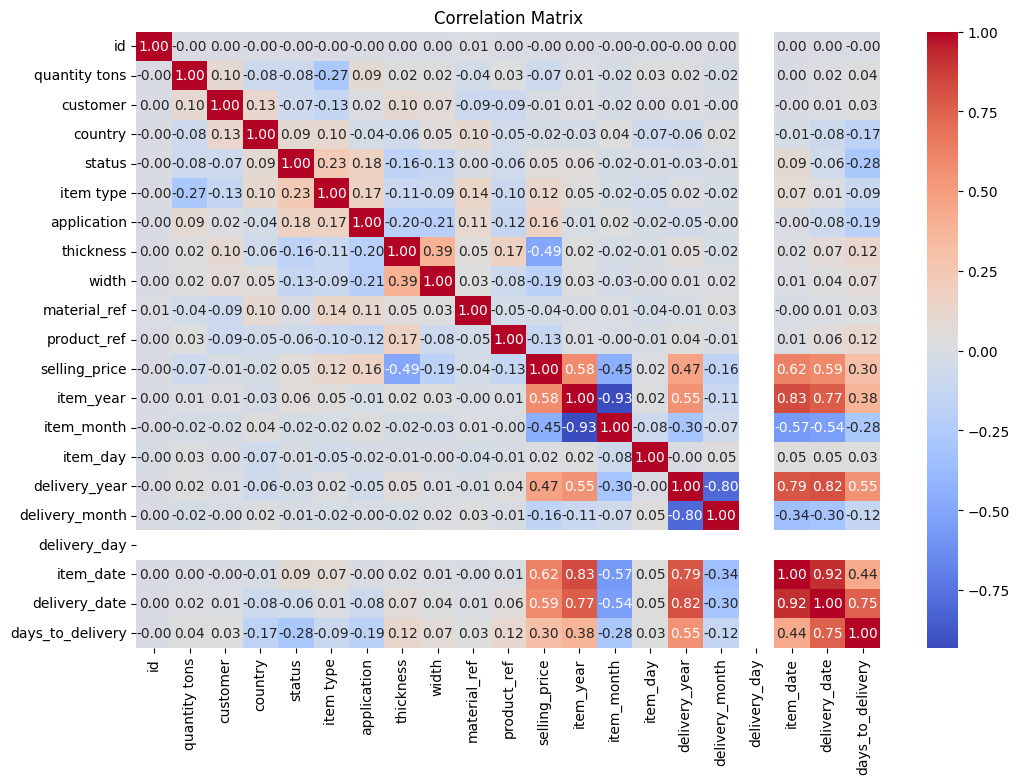

Highly correlated pairs of features (correlation > 0.9):
[('item_year', 'item_month'), ('item_date', 'delivery_date')]
Dropped features:
['delivery_date', 'item_month']
Updated DataFrame with dropped highly correlated columns saved to the Excel file.
       id  quantity tons  customer  country  status  item type  application  \
0  138813       4.863421  30156308     28.0       1          5         10.0   
1   46130       5.423898  30202938     25.0       1          5         41.0   
2  132315       5.423898  30153963     30.0       1          6         28.0   
3  146257       5.423898  30349574     32.0       1          3         59.0   
4   45978       5.423898  30211560     28.0       1          5         10.0   

   thickness   width  material_ref  product_ref  selling_price  item_year  \
0   0.675994  1500.0          5099     6.983347         854.00       2021   
1  -0.224961  1210.0          5203     6.983275        1047.00       2021   
2  -1.002383   952.0          9188     6.18

In [7]:
#Drop High correlated columns IN THE CLASSIFICATION MODELING DATASET

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1.xlsx"
df = pd.read_excel(file_path)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Find pairs of highly correlated features
threshold = 0.9
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated pairs of features (correlation > 0.9):")
print(high_corr_pairs)

# Drop one feature from each pair of highly correlated features
features_to_drop = list(set([pair[1] for pair in high_corr_pairs]))
df.drop(columns=features_to_drop, inplace=True)

print("Dropped features:")
print(features_to_drop)

# Save the updated DataFrame back to the Excel file
output_file = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1_dropped_corr.xlsx"
df.to_excel(output_file, index=False)

print("Updated DataFrame with dropped highly correlated columns saved to the Excel file.")
print(df.head())


In [8]:
#FEATURE ENGIEERING--ADDING NEW FEATURES or COLUMNS TO THE CLASSIFICATION MODELING DATASET

import pandas as pd

# Load the dataset
file_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1_dropped_corr.xlsx"
df = pd.read_excel(file_path)

# Ensure that the necessary columns exist in the DataFrame
required_columns = [ 
                    'quantity tons', 'thickness', 'width', 'selling_price']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")



# Create a domain-specific feature representing the volume of the material
df['volume'] = df['quantity tons'] * df['thickness'] * df['width']

# Calculate selling price per ton for each row
df['selling_price_per_ton'] = df['selling_price'] / df['quantity tons']

# Save the updated DataFrame back to the Excel file
output_file = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1_dropped_corr_agatr.xlsx"
df.to_excel(output_file, index=False)

print("Updated DataFrame with new features saved to the Excel file.")
print(df.head())


Updated DataFrame with new features saved to the Excel file.
       id  quantity tons  customer  country  status  item type  application  \
0  138813       4.863421  30156308     28.0       1          5         10.0   
1   46130       5.423898  30202938     25.0       1          5         41.0   
2  132315       5.423898  30153963     30.0       1          6         28.0   
3  146257       5.423898  30349574     32.0       1          3         59.0   
4   45978       5.423898  30211560     28.0       1          5         10.0   

   thickness   width  material_ref  ...  selling_price  item_year  item_day  \
0   0.675994  1500.0          5099  ...         854.00       2021         1   
1  -0.224961  1210.0          5203  ...        1047.00       2021         1   
2  -1.002383   952.0          9188  ...         644.33       2021         1   
3   0.808224  1317.0          5367  ...         768.00       2021         1   
4   1.318808  1980.0          1817  ...         577.00       2021    

In [3]:
import pandas as pd
df=pd.read_excel("C:\\Users\\HP\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1_dropped_corr_agatr.xlsx")
df

,id,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,...,selling_price,item_year,item_day,delivery_year,delivery_month,delivery_day,item_date,days_to_delivery,volume,selling_price_per_ton
0,138813,4.863421,30156308,28.0,1,5,10.0,0.675994,1500.0,5099,...,854.00,2021,1,2021,7,1,2021-04-01,91,4931.463451,175.596571
1,46130,5.423898,30202938,25.0,1,5,41.0,-0.224961,1210.0,5203,...,1047.00,2021,1,2021,4,1,2021-04-01,0,-1476.400441,193.034613
2,132315,5.423898,30153963,30.0,1,6,28.0,-1.002383,952.0,9188,...,644.33,2021,1,2021,1,1,2021-04-01,-90,-5175.853201,118.794644
3,146257,5.423898,30349574,32.0,1,3,59.0,0.808224,1317.0,5367,...,768.00,2021,1,2021,1,1,2021-04-01,-90,5773.363743,141.595590
4,45978,5.423898,30211560,28.0,1,5,10.0,1.318808,1980.0,1817,...,577.00,2021,1,2021,3,1,2021-04-01,-31,14163.099694,106.381062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150445,130638,5.180646,30200854,25.0,1,5,41.0,-0.040883,1220.0,5203,...,591.00,2020,2,2020,7,1,2020-07-02,-1,-258.393582,114.078442
150446,96637,5.423898,30200854,25.0,1,5,41.0,-0.051389,1500.0,5203,...,589.00,2020,2,2020,7,1,2020-07-02,-1,-418.092433,108.593493
150447,85355,4.376395,30200854,25.0,1,5,41.0,-0.346784,1250.0,5203,...,619.00,2020,2,2020,7,1,2020-07-02,-1,-1897.081325,141.440602
150448,72193,0.693147,30200854,25.0,1,5,41.0,-0.163482,1250.0,5203,...,601.00,2020,2,2020,7,1,2020-07-02,-1,-141.646000,867.059720


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150450 entries, 0 to 150449
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     150450 non-null  int64         
 1   quantity tons          150450 non-null  float64       
 2   customer               150450 non-null  int64         
 3   country                150450 non-null  float64       
 4   status                 150450 non-null  int64         
 5   item type              150450 non-null  int64         
 6   application            150450 non-null  float64       
 7   thickness              150450 non-null  float64       
 8   width                  150450 non-null  float64       
 9   material_ref           150450 non-null  int64         
 10  product_ref            150450 non-null  float64       
 11  selling_price          150450 non-null  float64       
 12  item_year              150450 non-null  int6

In [1]:
import pandas as pd

# Load the dataset from the specified file path
file_path = r"C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1_dropped_corr_agatr.xlsx"
df = pd.read_excel(file_path)

# List of columns to be removed
columns_to_remove = ['id', 'item_year', 'item_day', 'delivery_year', 'delivery_month', 'item_date']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)
df.to_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_classif_encoded_new_1_dropped_corr_agatr_1.xlsx")
# Display the first few rows of the dataframe to verify the columns are removed
print(df.head())


   quantity tons  customer  country  status  item type  application  \
0       4.863421  30156308     28.0       1          5         10.0   
1       5.423898  30202938     25.0       1          5         41.0   
2       5.423898  30153963     30.0       1          6         28.0   
3       5.423898  30349574     32.0       1          3         59.0   
4       5.423898  30211560     28.0       1          5         10.0   

   thickness   width  material_ref  product_ref  selling_price  delivery_day  \
0   0.675994  1500.0          5099     6.983347         854.00             1   
1  -0.224961  1210.0          5203     6.983275        1047.00             1   
2  -1.002383   952.0          9188     6.183954         644.33             1   
3   0.808224  1317.0          5367     6.983275         768.00             1   
4   1.318808  1980.0          1817     6.187140         577.00             1   

   days_to_delivery        volume  selling_price_per_ton  
0                91   4931.463451

In [2]:
import pandas as pd
df=pd.read_excel("C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_reg_encod.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   application             181673 non-null  float64
 1   country                 181673 non-null  float64
 2   customer                181673 non-null  int64  
 3   delivery_day            181671 non-null  float64
 4   delivery_month          181671 non-null  float64
 5   delivery_year           181671 non-null  float64
 6   id                      181673 non-null  object 
 7   item_day                181670 non-null  float64
 8   item_month              181670 non-null  float64
 9   item_year               181670 non-null  float64
 10  product_ref             181673 non-null  float64
 11  quantity tons           181672 non-null  float64
 12  selling_price           181673 non-null  float64
 13  thickness               181673 non-null  float64
 14  width               

In [4]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_reg_encod.xlsx"
data = pd.read_excel(file_path)

# Columns to drop
columns_to_drop = [
    'id', 'item_year', 'item_day', 'delivery_year', 'delivery_month', 
    'delivery_day', 'item_month'
]

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new Excel file
output_file = "C:\\Users\\HP\\GUVI_PROJ\\Copper_Set_one_modified_outliers_handled_skew_handled_reg_encod_new.xlsx"
data.to_excel(output_file, index=False)

print("Updated DataFrame saved to:", output_file)


Updated DataFrame saved to: C:\Users\HP\GUVI_PROJ\Copper_Set_one_modified_outliers_handled_skew_handled_reg_encod_new.xlsx
